## Load Data

In [1]:
import pandas as pd
import numpy as np
import os
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib_venn import venn3
from scipy import stats
from sklearn.metrics import silhouette_score
%matplotlib inline
import datetime
from chord import Chord

In [2]:
date = str(datetime.date.today())
print(date)

2021-12-14


In [2]:
#set working directory
os.chdir('/Users/kavyasharman/Documents/Projects/microLESA/')

In [4]:
#load data as df
pGroups = pd.read_csv('/Users/kavyasharman/Documents/Projects/microLESA/data/proteinGroups.txt', delimiter = '\t', low_memory = False)
pGroups.shape

(3760, 371)

In [5]:
pGroups.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
0,G3UZW7;A0A023T778;Q9CQL1;P61327,G3UZW7;A0A023T778;Q9CQL1;P61327,1;1;1;1,1;1;1;1,1;1;1;1,Protein mago nashi homolog 2;Protein mago nash...,Magohb;Magoh,tr|G3UZW7|G3UZW7_MOUSE Protein mago nashi homo...,4,1,...,NaN,0,9939,True,10517,104111;104112;104113;104114,113199;113200;113201;113202;113203,113200,NaN,NaN
1,O70589;A0A067XG53;F6Y9I5,O70589;A0A067XG53;F6Y9I5,2;2;1,2;2;1,2;2;1,Peripheral plasma membrane protein CASK,Cask,sp|O70589|CSKP_MOUSE Peripheral plasma membran...,3,2,...,NaN,1,5371;7221,True;True,5685;7650,57553;57554;57555;74694;74695,62421;62422;62423;81010;81011,62422;81011,NaN,NaN
2,A0A140T8M9;A0A140T8M0;A0A0B4J1I0;A0A075B5N0;A0...,A0A140T8M9;A0A140T8M0;A0A0B4J1I0;A0A075B5N0;A0...,1;1;1;1;1;1;1;1;1,1;1;1;1;1;1;1;1;1,1;1;1;1;1;1;1;1;1,Ig kappa chain V-II region 26-10,Igkv1-110;Igkv1-35;Igkv1-99;Igkv1-115,tr|A0A140T8M9|A0A140T8M9_MOUSE Immunoglobulin ...,9,1,...,NaN,2,7144,True,7567,74067;74068;74069;74070;74071,80341;80342;80343;80344;80345;80346;80347,80344,NaN,NaN
3,A0A075B5M7;A0A0G2JDV4;A0A0B4J1J2;A0A0B4J1J1,A0A075B5M7;A0A0G2JDV4;A0A0B4J1J2;A0A0B4J1J1,2;1;1;1,2;1;1;1,2;1;1;1,NaN,Igkv5-39;Igkv5-43;Igkv5-45,tr|A0A075B5M7|A0A075B5M7_MOUSE Immunoglobulin ...,4,2,...,NaN,3,3664;23181,True;True,3880;3881;24763,41615;41616;41617;41618;41619;239742,45159;45160;45161;45162;45163;260731,45163;260731,0,4
4,A0A075B5P3;A0A0A6YVP0;P01867,A0A075B5P3;A0A0A6YVP0;P01867,3;3;3,3;3;3,3;3;3,Ig gamma-2B chain C region,Ighg2b;Igh-3,tr|A0A075B5P3|A0A075B5P3_MOUSE Immunoglobulin ...,3,3,...,NaN,4,2087;3907;22401,True;True;True,2218;4134;23956,24252;24253;24254;24255;24256;24257;24258;4407...,26297;26298;26299;26300;26301;26302;26303;2630...,26297;47805;252619,NaN,NaN


In [6]:
pGroups.tail()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
3755,REV__Q9QZE7,REV__Q9QZE7,1,1,1,NaN,NaN,sp|Q9QZE7|TSNAX_MOUSE Translin-associated prot...,1,1,...,NaN,3755,13511,True,14418,136224;136225,147817;147818,147817,1946;1947,91;92
3756,S4R2J6;S4R165;S4R1X7;S4R2C1;S4R187;S4R2F5,S4R2J6;S4R165;S4R1X7;S4R2C1;S4R187;S4R2F5,16;16;15;15;15;15,1;1;1;1;1;1,1;1;1;1;1;1,NaN,Ank3,tr|S4R2J6|S4R2J6_MOUSE Ankyrin-3 OS=Mus muscul...,6,16,...,NaN,3756,1455;1705;2665;4244;5703;9994;10028;12460;1246...,False;True;False;False;False;False;False;False...,1533;1796;2831;4501;6036;10573;10608;13162;131...,16960;16961;16962;16963;16964;16965;16966;1696...,18407;18408;18409;18410;18411;18412;18413;1841...,18413;21709;33621;51114;66447;113651;113977;13...,552;553,182;203
3757,S4R192,S4R192,3,1,1,NaN,Sec31a,tr|S4R192|S4R192_MOUSE Protein transport prote...,1,3,...,NaN,3757,10933;16514;22778,False;False;True,11562;17664;24344,113810;113811;113812;113813;113814;113815;1138...,123686;123687;123688;123689;123690;123691;1236...,123694;178974;256766,NaN,NaN
3758,V9GWV8;Q3V335;V9GXK3,V9GWV8;Q3V335;V9GXK3,4;3;2,1;0;0,1;0;0,NaN,Nedd4,tr|V9GWV8|V9GWV8_MOUSE E3 ubiquitin-protein li...,3,4,...,NaN,3758,3286;20769;22815;23095,False;True;False;False,3485;22231;24385;24386;24676,37878;37879;37880;37881;37882;37883;37884;3788...,41143;41144;41145;41146;41147;41148;41149;4115...,41143;230341;257087;259963,936,111
3759,V9GX06;A0A0R4J0X7;S4R2G5;Q64467,V9GX06,4;1;1;1,1;1;1;1,1;1;1;1,NaN,Gm11214,tr|V9GX06|V9GX06_MOUSE Predicted gene 11214 (F...,4,4,...,NaN,3759,1045;15252;22879;22880,True;False;False;False,1093;16340;24452;24453;24454,12247;12248;154168;154169;154170;154171;154172...,13285;13286;13287;167332;167333;167334;167335;...,13287;167340;257908;257916,172;173,176;179


In [7]:
#remove proteins identified as "reverse", "only identified by site", and "potential contaminant"
pGroups_proc = pGroups[pGroups.Reverse != '+']
pGroups_proc = pGroups_proc[pGroups_proc['Only identified by site'] != '+']
pGroups_proc = pGroups_proc[pGroups_proc['Potential contaminant'] != '+']
pGroups_proc = pGroups_proc.reset_index(drop=True)
pGroups_proc.tail()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
3608,Q9Z2X1;J3QMT0;J3QM80;J3QP45;J3QMV8;J3QNH2,Q9Z2X1;J3QMT0;J3QM80,10;7;7;3;2;1,8;7;7;3;2;1,8;7;7;3;2;1,Heterogeneous nuclear ribonucleoprotein F;Hete...,Hnrnpf,sp|Q9Z2X1|HNRPF_MOUSE Heterogeneous nuclear ri...,6,10,...,NaN,3705,2655;9429;10400;13472;13473;15976;19341;19692;...,False;True;True;True;True;True;True;True;False...,2820;9982;11005;14366;14367;14368;17104;20682;...,30975;30976;30977;30978;30979;30980;30981;3098...,33513;33514;33515;33516;33517;33518;33519;3352...,33513;107092;117607;147535;147570;174314;21329...,1926;1927,2;345
3609,Q9Z2Z6,Q9Z2Z6,3,3,3,Mitochondrial carnitine/acylcarnitine carrier ...,Slc25a20,sp|Q9Z2Z6|MCAT_MOUSE Mitochondrial carnitine/a...,1,3,...,NaN,3706,418;5649;19235,True;True;True,431;5977;20568,5063;5064;5065;5066;5067;5068;5069;5070;5071;5...,5497;5498;5499;5500;5501;5502;5503;5504;5505;5...,5506;65881;211665,NaN,NaN
3610,Q9Z315;A0A494B9E9,Q9Z315,7;3,7;3,7;3,U4/U6.U5 tri-snRNP-associated protein 1,Sart1,sp|Q9Z315|SNUT1_MOUSE U4/U6.U5 tri-snRNP-assoc...,2,7,...,NaN,3707,398;2538;2539;4589;4689;13650;15713,True;True;True;True;True;True;True,411;2693;2694;4863;4970;4971;14610;16826,4882;4883;4884;4885;4886;4887;29644;29645;2964...,5301;5302;5303;5304;5305;5306;32096;32097;3209...,5304;32096;32124;54448;55730;149357;172113,1928,159
3611,S4R2J6;S4R165;S4R1X7;S4R2C1;S4R187;S4R2F5,S4R2J6;S4R165;S4R1X7;S4R2C1;S4R187;S4R2F5,16;16;15;15;15;15,1;1;1;1;1;1,1;1;1;1;1;1,NaN,Ank3,tr|S4R2J6|S4R2J6_MOUSE Ankyrin-3 OS=Mus muscul...,6,16,...,NaN,3756,1455;1705;2665;4244;5703;9994;10028;12460;1246...,False;True;False;False;False;False;False;False...,1533;1796;2831;4501;6036;10573;10608;13162;131...,16960;16961;16962;16963;16964;16965;16966;1696...,18407;18408;18409;18410;18411;18412;18413;1841...,18413;21709;33621;51114;66447;113651;113977;13...,552;553,182;203
3612,S4R192,S4R192,3,1,1,NaN,Sec31a,tr|S4R192|S4R192_MOUSE Protein transport prote...,1,3,...,NaN,3757,10933;16514;22778,False;False;True,11562;17664;24344,113810;113811;113812;113813;113814;113815;1138...,123686;123687;123688;123689;123690;123691;1236...,123694;178974;256766,NaN,NaN


In [8]:
pGroups_proc

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions
0,G3UZW7;A0A023T778;Q9CQL1;P61327,G3UZW7;A0A023T778;Q9CQL1;P61327,1;1;1;1,1;1;1;1,1;1;1;1,Protein mago nashi homolog 2;Protein mago nash...,Magohb;Magoh,tr|G3UZW7|G3UZW7_MOUSE Protein mago nashi homo...,4,1,...,NaN,0,9939,True,10517,104111;104112;104113;104114,113199;113200;113201;113202;113203,113200,NaN,NaN
1,O70589;A0A067XG53;F6Y9I5,O70589;A0A067XG53;F6Y9I5,2;2;1,2;2;1,2;2;1,Peripheral plasma membrane protein CASK,Cask,sp|O70589|CSKP_MOUSE Peripheral plasma membran...,3,2,...,NaN,1,5371;7221,True;True,5685;7650,57553;57554;57555;74694;74695,62421;62422;62423;81010;81011,62422;81011,NaN,NaN
2,A0A140T8M9;A0A140T8M0;A0A0B4J1I0;A0A075B5N0;A0...,A0A140T8M9;A0A140T8M0;A0A0B4J1I0;A0A075B5N0;A0...,1;1;1;1;1;1;1;1;1,1;1;1;1;1;1;1;1;1,1;1;1;1;1;1;1;1;1,Ig kappa chain V-II region 26-10,Igkv1-110;Igkv1-35;Igkv1-99;Igkv1-115,tr|A0A140T8M9|A0A140T8M9_MOUSE Immunoglobulin ...,9,1,...,NaN,2,7144,True,7567,74067;74068;74069;74070;74071,80341;80342;80343;80344;80345;80346;80347,80344,NaN,NaN
3,A0A075B5M7;A0A0G2JDV4;A0A0B4J1J2;A0A0B4J1J1,A0A075B5M7;A0A0G2JDV4;A0A0B4J1J2;A0A0B4J1J1,2;1;1;1,2;1;1;1,2;1;1;1,NaN,Igkv5-39;Igkv5-43;Igkv5-45,tr|A0A075B5M7|A0A075B5M7_MOUSE Immunoglobulin ...,4,2,...,NaN,3,3664;23181,True;True,3880;3881;24763,41615;41616;41617;41618;41619;239742,45159;45160;45161;45162;45163;260731,45163;260731,0,4
4,A0A075B5P3;A0A0A6YVP0;P01867,A0A075B5P3;A0A0A6YVP0;P01867,3;3;3,3;3;3,3;3;3,Ig gamma-2B chain C region,Ighg2b;Igh-3,tr|A0A075B5P3|A0A075B5P3_MOUSE Immunoglobulin ...,3,3,...,NaN,4,2087;3907;22401,True;True;True,2218;4134;23956,24252;24253;24254;24255;24256;24257;24258;4407...,26297;26298;26299;26300;26301;26302;26303;2630...,26297;47805;252619,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,Q9Z2X1;J3QMT0;J3QM80;J3QP45;J3QMV8;J3QNH2,Q9Z2X1;J3QMT0;J3QM80,10;7;7;3;2;1,8;7;7;3;2;1,8;7;7;3;2;1,Heterogeneous nuclear ribonucleoprotein F;Hete...,Hnrnpf,sp|Q9Z2X1|HNRPF_MOUSE Heterogeneous nuclear ri...,6,10,...,NaN,3705,2655;9429;10400;13472;13473;15976;19341;19692;...,False;True;True;True;True;True;True;True;False...,2820;9982;11005;14366;14367;14368;17104;20682;...,30975;30976;30977;30978;30979;30980;30981;3098...,33513;33514;33515;33516;33517;33518;33519;3352...,33513;107092;117607;147535;147570;174314;21329...,1926;1927,2;345
3609,Q9Z2Z6,Q9Z2Z6,3,3,3,Mitochondrial carnitine/acylcarnitine carrier ...,Slc25a20,sp|Q9Z2Z6|MCAT_MOUSE Mitochondrial carnitine/a...,1,3,...,NaN,3706,418;5649;19235,True;True;True,431;5977;20568,5063;5064;5065;5066;5067;5068;5069;5070;5071;5...,5497;5498;5499;5500;5501;5502;5503;5504;5505;5...,5506;65881;211665,NaN,NaN
3610,Q9Z315;A0A494B9E9,Q9Z315,7;3,7;3,7;3,U4/U6.U5 tri-snRNP-associated protein 1,Sart1,sp|Q9Z315|SNUT1_MOUSE U4/U6.U5 tri-snRNP-assoc...,2,7,...,NaN,3707,398;2538;2539;4589;4689;13650;15713,True;True;True;True;True;True;True,411;2693;2694;4863;4970;4971;14610;16826,4882;4883;4884;4885;4886;4887;29644;29645;2964...,5301;5302;5303;5304;5305;5306;32096;32097;3209...,5304;32096;32124;54448;55730;149357;172113,1928,159
3611,S4R2J6;S4R165;S4R1X7;S4R2C1;S4R187;S4R2F5,S4R2J6;S4R165;S4R1X7;S4R2C1;S4R187;S4R2F5,16;16;15;15;15;15,1;1;1;1;1;1,1;1;1;1;1;1,NaN,Ank3,tr|S4R2J6|S4R2J6_MOUSE Ankyrin-3 OS=Mus muscul...,6,16,...,NaN,3756,1455;1705;2665;4244;5703;9994;10028;12460;1246...,False;True;False;False;False;False;False;False...,1533;1796;2831;4501;6036;10573;10608;13162;131...,16960;16961;16962;16963;16964;16965;16966;1696...,18407;18408;18409;18410;18411;18412;18413;1841...,18413;21709;33621;51114;66447;113651;113977;13...,552;553,182;203


In [9]:
#create database of all proteins in protein groups
proteins = pGroups_proc[' Protein IDs'].str.split(";", expand=True)
proteins = proteins.stack()
proteins = list(set(proteins))
proteins = pd.DataFrame(proteins)
proteins.to_csv('outs/' + date + '_allProteinsFromPGroups.csv')

In [10]:
#extract LFQ intensity and create new df with expt classifiers
#instead of group by region or timepoint, add region+timepoint as factors

def make_lfq(dataframe, species):
    temp = dataframe.columns
    lfq = pd.DataFrame()
    filename = str('/Users/kavyasharman/Documents/Projects/microLESA/outs/' + date + '_'+ species + '_lfq.csv')
    string = "LFQ"
    for i in temp:
        if string in i:
            lfq = lfq.append(dataframe[i])
    lfq.columns = dataframe[' Protein IDs']
    lfq = lfq.reset_index()
    lfq['index'] = lfq['index'].str.strip("LFQ intensity ")
    lfq[['TimePoint', 'BioRep', 'Region', 'TechRep']] = lfq['index'].str.split("_", expand=True)
    lfq['DPI_Region_BioRep'] = lfq['TimePoint'] + "_" + lfq['Region'] + "_" + lfq['BioRep']
    lfq['DPI_Region'] = lfq['TimePoint'] + "_" + lfq['Region']
    lfq = lfq.set_index('index')
    lfq = lfq.sort_values(by =['TimePoint', 'Region', 'BioRep', 'TechRep'], ascending=False)
  #  lfq.to_csv(filename)
    return lfq

#extract LFQ intensity for all proteins and create new df 'lfq' with expt classifiers
lfq = make_lfq(pGroups_proc, 'combined')
lfq.shape

(42, 3619)

In [11]:
lfq.head()

Protein IDs,G3UZW7;A0A023T778;Q9CQL1;P61327,O70589;A0A067XG53;F6Y9I5,A0A140T8M9;A0A140T8M0;A0A0B4J1I0;A0A075B5N0;A0A075B5K8;F6XWB2;A0A140T8N1;A0A0G2JDE5;P01631,A0A075B5M7;A0A0G2JDV4;A0A0B4J1J2;A0A0B4J1J1,A0A075B5P3;A0A0A6YVP0;P01867,A0A075B5P5;A0A1Y7VJN6;P03987,A0A075B6A0;A0A075B5P6;P01872,A0A075B5R2;A0A075B5R3;A0A0A6YX91;P01786,A0A075B5S5;A0A0A6YXL5,A0A075B5T3;J3QK03;A0A0A6YWS9,...,Q9Z2Z6,Q9Z315;A0A494B9E9,S4R2J6;S4R165;S4R1X7;S4R2C1;S4R187;S4R2F5,S4R192,TimePoint,BioRep,Region,TechRep,DPI_Region_BioRep,DPI_Region
index,,,,,,,,,,,,,,,,,,,,,
4DPI_2_LE_4,0.0,0.0,0.0,0.0,0.0,0.0,11850000.0,489990.0,0.0,0.0,...,0.0,954220.0,0.0,0.0,4DPI,2,LE,4,4DPI_LE_2,4DPI_LE
4DPI_2_LE_2,0.0,0.0,0.0,0.0,0.0,0.0,13198000.0,0.0,0.0,0.0,...,668000.0,1377400.0,0.0,0.0,4DPI,2,LE,2,4DPI_LE_2,4DPI_LE
4DPI_2_LE_1,0.0,0.0,0.0,0.0,0.0,0.0,14041000.0,1280300.0,0.0,0.0,...,0.0,922440.0,0.0,0.0,4DPI,2,LE,1,4DPI_LE_2,4DPI_LE
4DPI_1_LE_2,0.0,0.0,0.0,0.0,0.0,0.0,8327300.0,0.0,0.0,0.0,...,1441400.0,0.0,0.0,0.0,4DPI,1,LE,2,4DPI_LE_1,4DPI_LE
4DPI_1_LE_1,0.0,0.0,0.0,0.0,0.0,0.0,9088300.0,0.0,0.0,0.0,...,1189200.0,1117600.0,0.0,0.0,4DPI,1,LE,1,4DPI_LE_1,4DPI_LE


In [12]:
# calculate missing values (i.e. LFQ = 0)
lfq_nan = lfq.replace(0, np.nan)
number_missing_values = lfq_nan.transpose().isnull().sum()
percent_missing_values = lfq_nan.transpose().isnull().mean() * 100
percent_missing_values

index
4DPI_2_LE_4     52.721746
4DPI_2_LE_2     47.250622
4DPI_2_LE_1     52.334899
4DPI_1_LE_2     77.231279
4DPI_1_LE_1     59.712628
4DPI_3_CO_3     56.452059
4DPI_3_CO_2     60.790274
4DPI_2_CO_3     57.750760
4DPI_2_CO_2     53.302017
4DPI_2_CO_1     58.717878
4DPI_1_CO_2     65.183752
4DPI_1_CO_1     50.345399
4DPI_3_AB_3     46.200608
4DPI_3_AB_2     48.798011
4DPI_2_AB_3     71.732523
4DPI_2_AB_2     73.003592
4DPI_2_AB_1     36.971539
4DPI_1_AB_3     45.924288
4DPI_1_AB_2     59.463940
4DPI_1_AB_1     48.770379
10DPI_5_LE_3    31.030671
10DPI_4_LE_3    38.933407
10DPI_4_LE_2    36.363636
10DPI_4_LE_1    46.283504
10DPI_3_LE_2    36.474164
10DPI_3_LE_1    37.275490
10DPI_4_CO_4    64.631114
10DPI_4_CO_3    72.229898
10DPI_3_CO_3    63.857419
10DPI_3_CO_2    58.911301
10DPI_2_CO_3    95.440729
10DPI_2_CO_2    92.898591
10DPI_2_CO_1    89.444598
10DPI_4_AB_3    41.751865
10DPI_4_AB_2    47.913788
10DPI_4_AB_1    51.782260
10DPI_3_AB_3    42.332136
10DPI_3_AB_2    52.832274
10DPI_

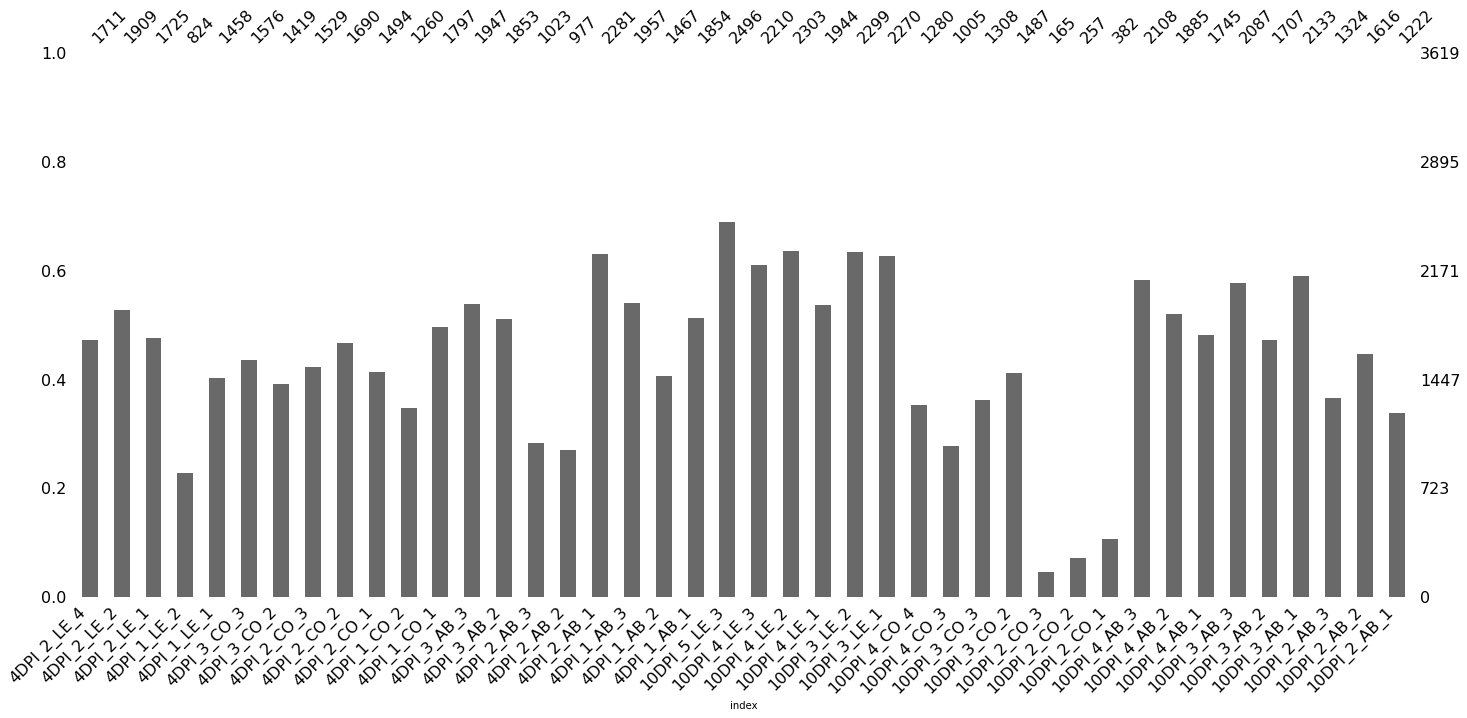

In [13]:
msno.bar(lfq_nan.transpose())
plt.savefig('outs/' + date + '_missingValues.svg')

In [14]:
#z-score calculation to drop outliers

z = np.abs(stats.zscore(percent_missing_values))
print(z)
print(np.where(z > 2))


[0.21484596 0.58111471 0.24074375 1.42596406 0.25316412 0.03488274
 0.32530796 0.12182532 0.17599927 0.1865698  0.61943287 0.37393238
 0.65140871 0.47752355 1.05784547 1.14293821 1.269256   0.66990713
 0.23651554 0.47937339 1.66697207 1.13791721 1.30995253 0.64585919
 1.30255316 1.24890774 0.58243603 1.09114263 0.53064044 0.19951869
 2.64501006 2.47482458 2.24359431 0.9492333  0.5367185  0.27774059
 0.91038662 0.20744659 0.99547936 0.50104297 0.03911095 0.68972687]
(array([30, 31, 32]),)


In [15]:
#z-score calculation to drop outliers
z = np.abs(stats.zscore(percent_missing_values))
z>2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False])

In [16]:
#list of outlier samples
outliers = percent_missing_values.sort_values(ascending=False)[0:3].index
outliers

Index(['10DPI_2_CO_3', '10DPI_2_CO_2', '10DPI_2_CO_1'], dtype='object', name='index')

In [17]:
#drop outliers
combined_lfq = make_lfq(pGroups_proc, 'combined').drop(outliers, axis=0)
combined_lfq.to_csv('outs/' + date + '_combined_lfq.csv')

## Combined analysis

In [18]:
combined_lfq.head()

Protein IDs,G3UZW7;A0A023T778;Q9CQL1;P61327,O70589;A0A067XG53;F6Y9I5,A0A140T8M9;A0A140T8M0;A0A0B4J1I0;A0A075B5N0;A0A075B5K8;F6XWB2;A0A140T8N1;A0A0G2JDE5;P01631,A0A075B5M7;A0A0G2JDV4;A0A0B4J1J2;A0A0B4J1J1,A0A075B5P3;A0A0A6YVP0;P01867,A0A075B5P5;A0A1Y7VJN6;P03987,A0A075B6A0;A0A075B5P6;P01872,A0A075B5R2;A0A075B5R3;A0A0A6YX91;P01786,A0A075B5S5;A0A0A6YXL5,A0A075B5T3;J3QK03;A0A0A6YWS9,...,Q9Z2Z6,Q9Z315;A0A494B9E9,S4R2J6;S4R165;S4R1X7;S4R2C1;S4R187;S4R2F5,S4R192,TimePoint,BioRep,Region,TechRep,DPI_Region_BioRep,DPI_Region
index,,,,,,,,,,,,,,,,,,,,,
4DPI_2_LE_4,0.0,0.0,0.0,0.0,0.0,0.0,11850000.0,489990.0,0.0,0.0,...,0.0,954220.0,0.0,0.0,4DPI,2,LE,4,4DPI_LE_2,4DPI_LE
4DPI_2_LE_2,0.0,0.0,0.0,0.0,0.0,0.0,13198000.0,0.0,0.0,0.0,...,668000.0,1377400.0,0.0,0.0,4DPI,2,LE,2,4DPI_LE_2,4DPI_LE
4DPI_2_LE_1,0.0,0.0,0.0,0.0,0.0,0.0,14041000.0,1280300.0,0.0,0.0,...,0.0,922440.0,0.0,0.0,4DPI,2,LE,1,4DPI_LE_2,4DPI_LE
4DPI_1_LE_2,0.0,0.0,0.0,0.0,0.0,0.0,8327300.0,0.0,0.0,0.0,...,1441400.0,0.0,0.0,0.0,4DPI,1,LE,2,4DPI_LE_1,4DPI_LE
4DPI_1_LE_1,0.0,0.0,0.0,0.0,0.0,0.0,9088300.0,0.0,0.0,0.0,...,1189200.0,1117600.0,0.0,0.0,4DPI,1,LE,1,4DPI_LE_1,4DPI_LE


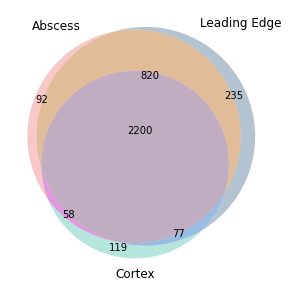

In [19]:
#plot venn diagram of protein groups
df = combined_lfq.groupby('Region').sum()

df = df.replace(0, np.nan)
df_missing_values = df.transpose().isnull().sum()
df_present_values = df.shape[1]-df_missing_values

df1 = df.transpose()

df_ab = df1['AB']
df_ab = df_ab.dropna()
set_ab = df_ab.index.values
set_ab = set(set_ab)

df_le = df1['LE']
df_le = df_le.dropna()
set_le = df_le.index.values
set_le = set(set_le)

df_co = df1['CO']
df_co = df_co.dropna()
set_co = df_co.index.values
set_co = set(set_co)


df1.head()

df1.dropna(subset=['AB'])


#from importlib import reload
#reload(plt)



plt.figure(figsize=(5,5))
vd = venn3([set_ab, set_le, set_co], ('Abscess', 'Leading Edge', 'Cortex'))
vd.get_patch_by_id("100").set_color("#EF767A")
vd.get_patch_by_id('100').set_edgecolor('none')
vd.get_patch_by_id('100').set_alpha(0.4)
vd.get_patch_by_id("001").set_color("#49BEAA")
vd.get_patch_by_id('001').set_edgecolor('none')
vd.get_patch_by_id('001').set_alpha(0.4)
vd.get_patch_by_id("010").set_color("#456990")
vd.get_patch_by_id('010').set_edgecolor('none')
vd.get_patch_by_id('010').set_alpha(0.4)


plt.savefig('outs/' + date + '_venn_combined.svg')

In [20]:
### Function to separate data and labels
def df_sep(label, dataframe):
    X = dataframe.drop(['TimePoint', 'TechRep', 'BioRep', 'Region', 'DPI_Region_BioRep', 'DPI_Region'], axis=1)
    y = dataframe[label]
    return X,y

In [21]:
X,Y = df_sep('DPI_Region', combined_lfq)
Y
y = pd.factorize(Y)[0]


In [22]:
X.to_csv('/Users/kavyasharman/Documents/Projects/microLESA/outs/' + date + '_combined_X.csv')

## PCA

In [23]:
pca = PCA()
pca.fit_transform(X)

array([[-1.20613918e+09, -7.35069505e+08,  1.20642660e+09, ...,
        -9.66779606e+06,  3.77862408e+07,  2.94952004e-07],
       [ 5.50887608e+08, -6.44020375e+08,  3.78395103e+07, ...,
         4.48483120e+07,  3.02168233e+07,  2.94952004e-07],
       [ 2.78911665e+08, -1.35151935e+09, -1.10286837e+08, ...,
        -3.92765751e+07, -2.82151875e+07,  2.94952004e-07],
       ...,
       [-2.78629898e+09, -1.91817266e+08,  2.13531506e+08, ...,
        -7.88043640e+06, -1.54576178e+07,  2.94952004e-07],
       [-2.14104411e+09, -9.88192949e+07,  8.11645909e+08, ...,
        -2.20069992e+06, -1.01797990e+07,  2.94952004e-07],
       [-2.01959630e+09, -1.92026814e+08, -3.13821517e+08, ...,
         2.28581628e+06,  2.49944228e+07,  2.94952004e-07]])

In [24]:
components = pca.components_
components.shape

(39, 3613)

In [25]:
X.shape

(39, 3613)

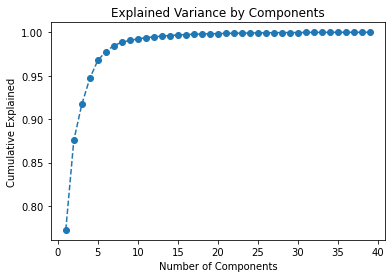

In [26]:
plt.figure()
plt.plot(range(1,40), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained')
plt.savefig('outs/' + date + '_combined_PCA_explainedVariance.svg')

In [27]:
pca_expl_var = pca.explained_variance_ratio_
pca_expl_var

array([7.72585327e-01, 1.03009194e-01, 4.14244991e-02, 2.99833868e-02,
       2.06562695e-02, 1.00463271e-02, 6.99901733e-03, 3.76353515e-03,
       2.13194779e-03, 1.71263813e-03, 1.48846065e-03, 9.14578266e-04,
       8.24462531e-04, 6.94519592e-04, 5.66674631e-04, 4.76616717e-04,
       4.02062568e-04, 2.88359638e-04, 2.56272367e-04, 2.26789690e-04,
       2.22757395e-04, 1.81912857e-04, 1.54660794e-04, 1.38718971e-04,
       1.23622374e-04, 1.12507129e-04, 9.61538441e-05, 8.23296203e-05,
       6.69051649e-05, 6.17230689e-05, 5.51396189e-05, 5.09239881e-05,
       4.03391810e-05, 3.97261547e-05, 3.53797674e-05, 3.17609348e-05,
       2.94709459e-05, 2.50296281e-05, 4.93141904e-33])

In [28]:
scores_pca = pca.fit_transform(X)

#pca loadings
loadings = pd.DataFrame(pca.components_.T, index=X.columns)

In [29]:
scores_pca.shape

(39, 39)

In [30]:
pd.DataFrame(scores_pca).to_csv('/Users/kavyasharman/Documents/Projects/microLESA/outs/' + date + '_combined_scores_pca.csv')

In [31]:
loadings.to_csv('/Users/kavyasharman/Documents/Projects/microLESA/outs/' + date + '_combined_loadings_pca.csv')

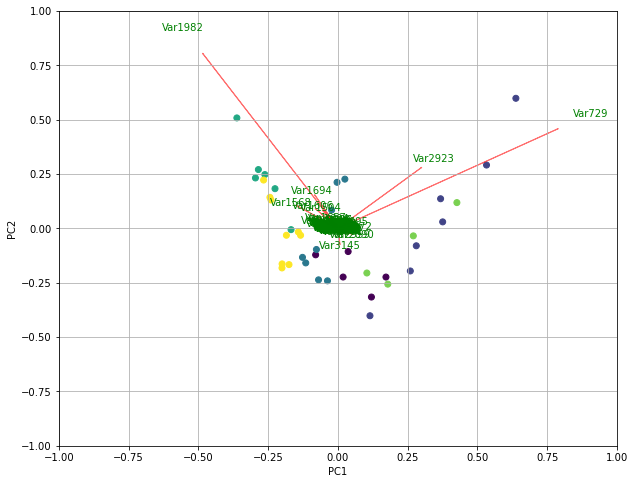

In [32]:
#https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis/50845697#50845697

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(10,8))
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(scores_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.savefig('outs/' + date + '_combined_PCA_loadings.png')

### Silhouette scores to determine k


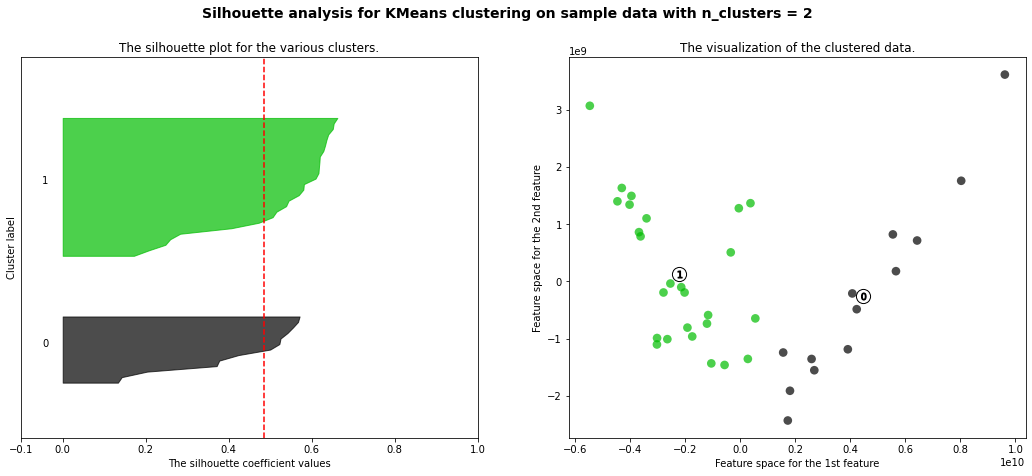

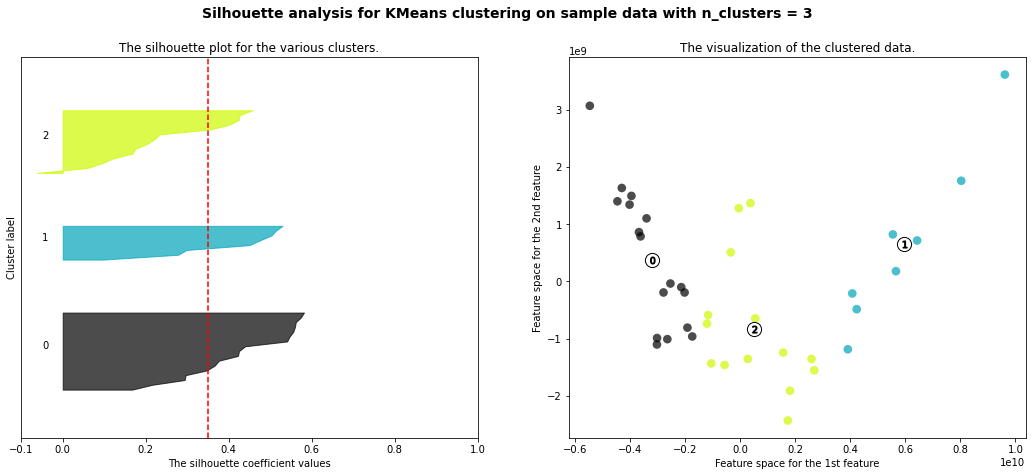

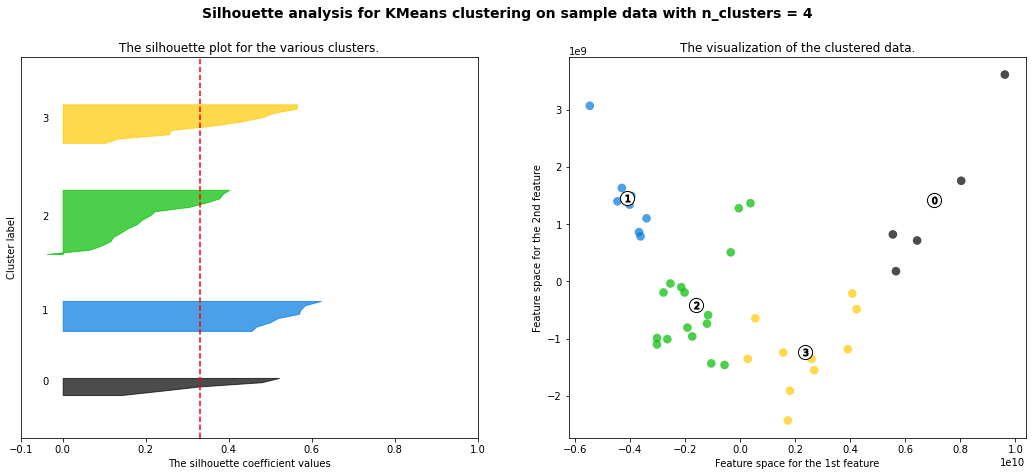

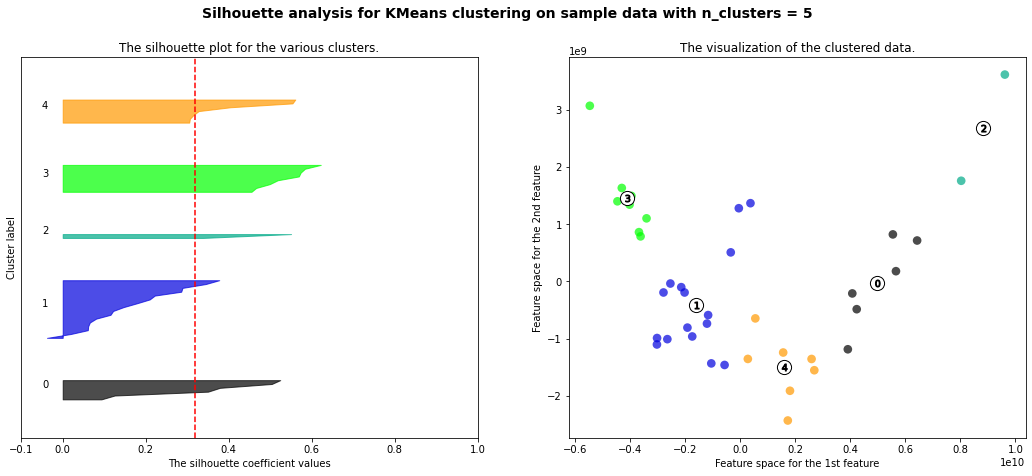

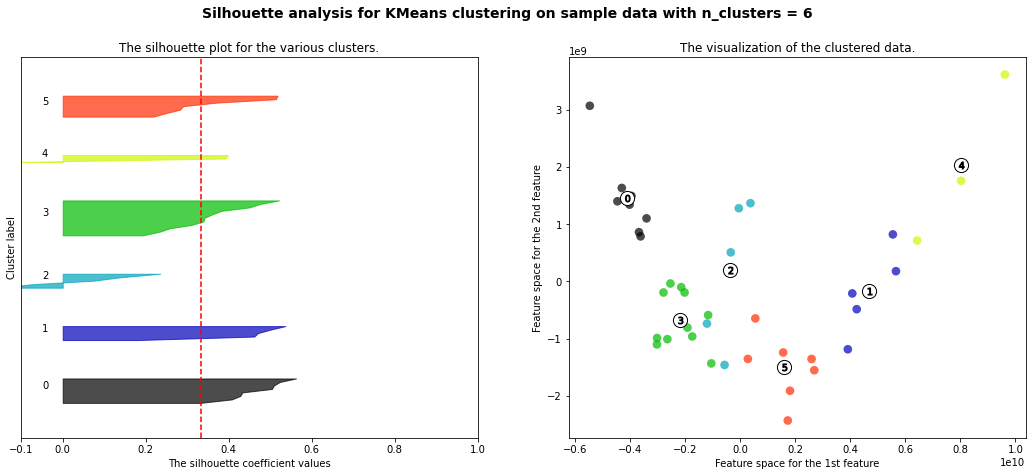

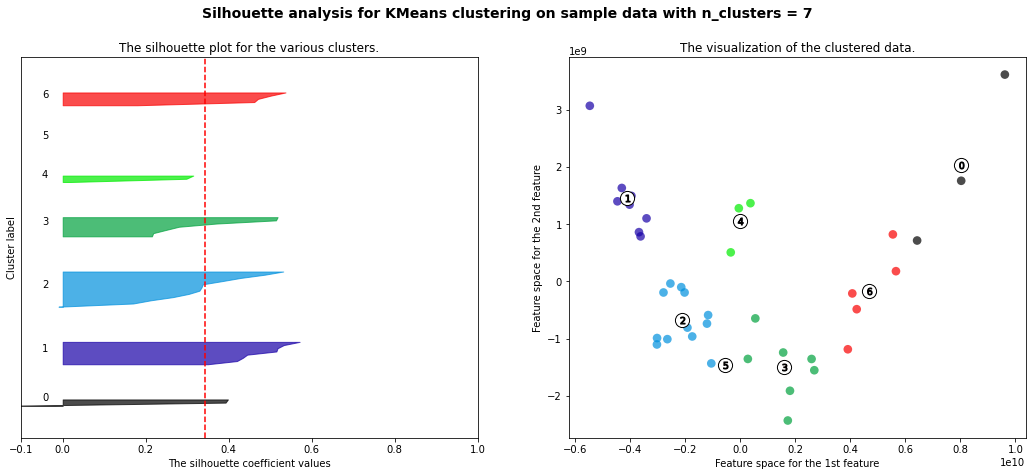

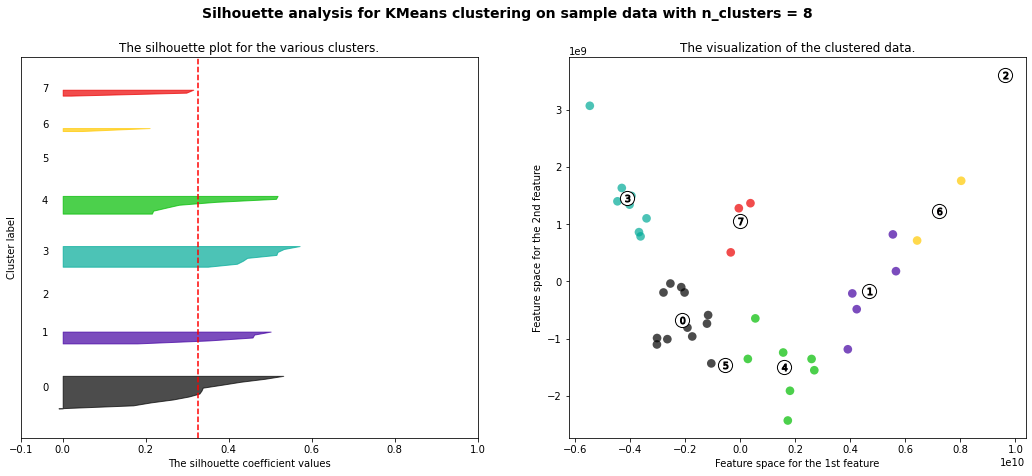

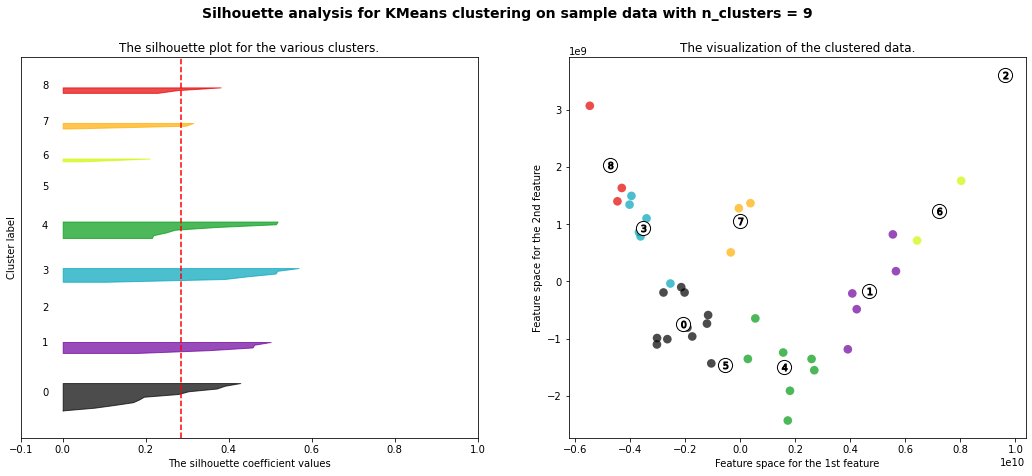

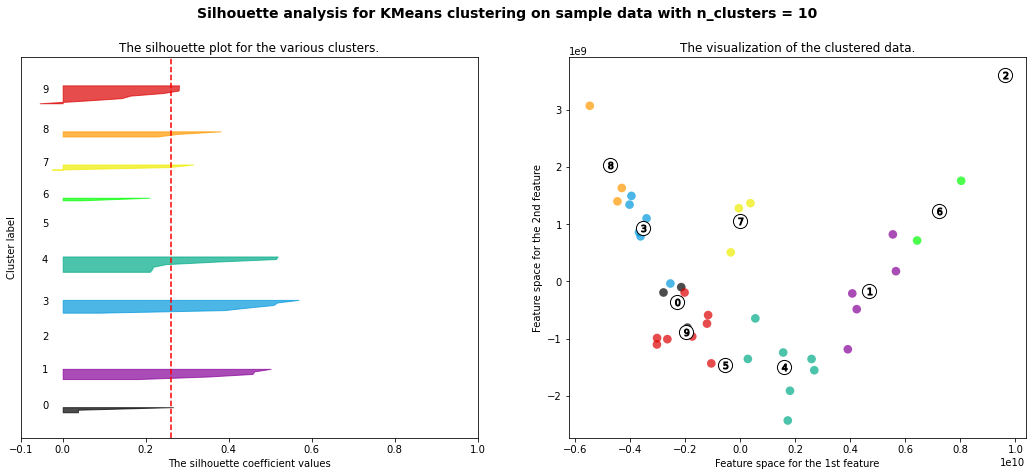

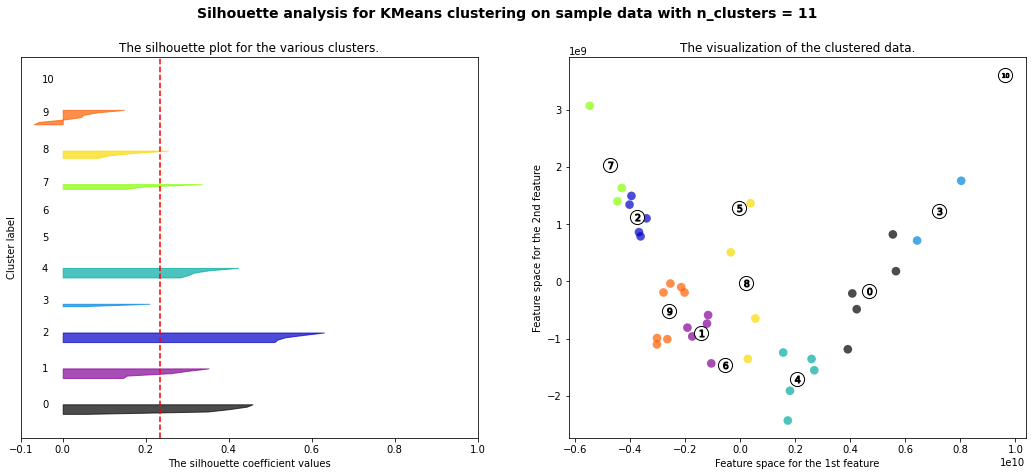

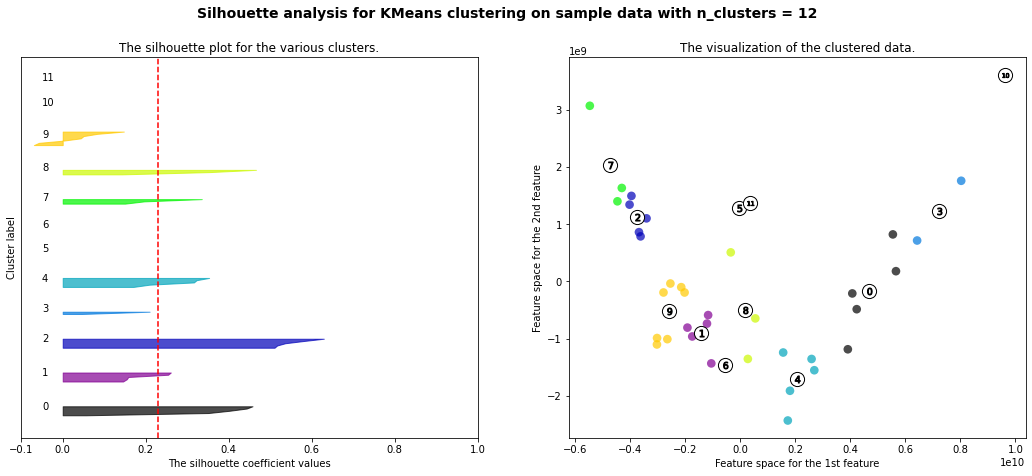

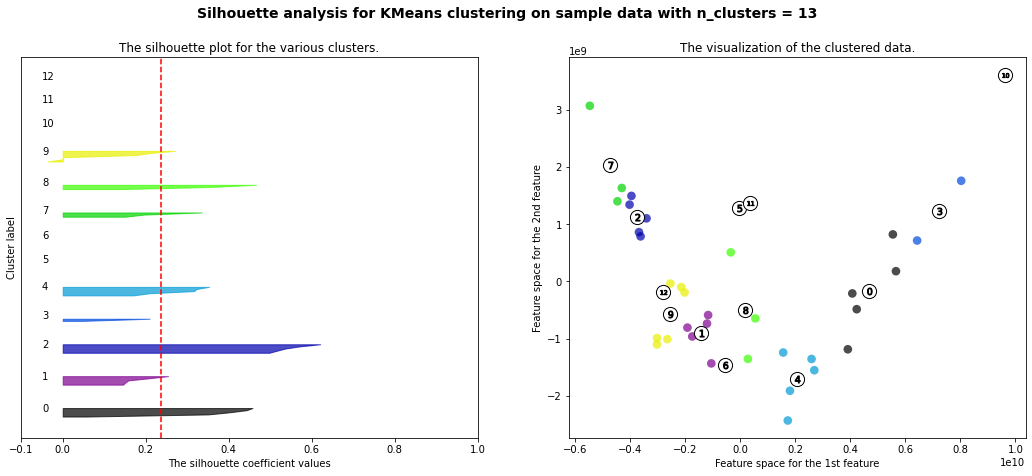

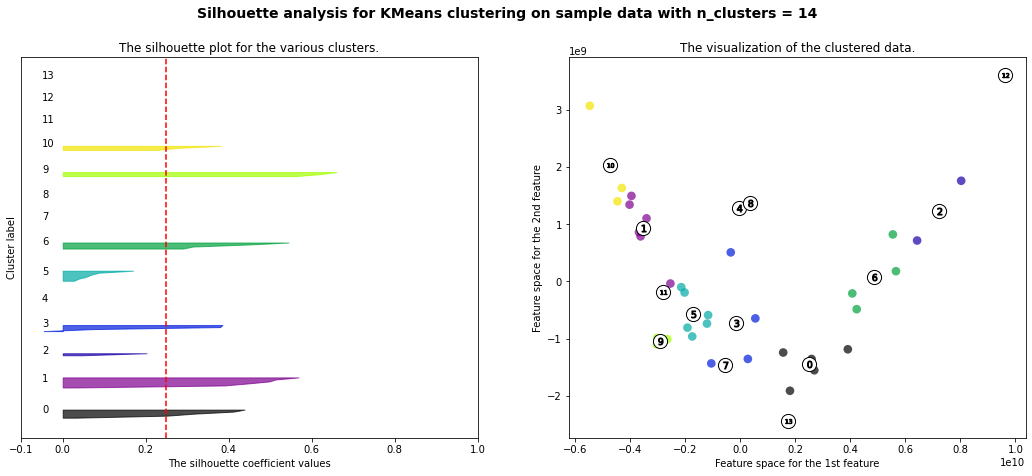

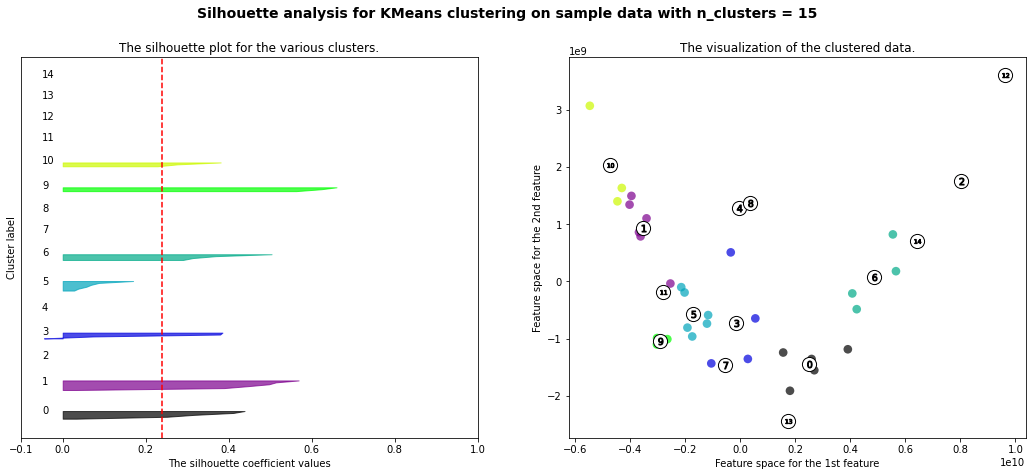

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15]
silhouette_scores_euc = pd.DataFrame(columns = ['k', 'score'])

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scores_pca) + (n_clusters + 1) * 10])


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scores_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scores_pca, cluster_labels)
  #  print("For n_clusters =", n_clusters,
  #        "The average silhouette_score is :", silhouette_avg)
    silhouette_scores_euc = silhouette_scores_euc.append(pd.DataFrame({'k': n_clusters, 'score': silhouette_avg}, index=[0]), ignore_index=True)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scores_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scores_pca[:, 0], scores_pca[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.savefig('outs/' + date + '_combined_silhouette_scores_euc_' + str(n_clusters) + '.svg')
    
silhouette_scores_euc.to_csv('outs/' + date + '_combined_silhouette_scores_euc.csv')

In [34]:
silhouette_scores_euc

,k,score
0,2,0.484378
1,3,0.351101
2,4,0.331259
3,5,0.319485
4,6,0.334392
5,7,0.342704
6,8,0.327104
7,9,0.285408
8,10,0.260599
9,11,0.234079


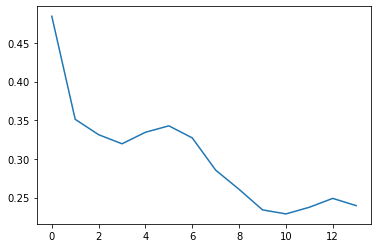

In [36]:
plt.plot(silhouette_scores_euc['score'])

### k=5

In [47]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
kmeans_labels = kmeans_pca.labels_


In [48]:
kmeans_labels_df = pd.DataFrame(kmeans_labels)

In [49]:
cluster_centers = kmeans_pca.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers).to_csv('outs/' + date + '_combined_kmeans_clusterCenters.csv')

In [50]:
cluster_centers = kmeans_pca.cluster_centers_
df_segm_pca_kmeans = pd.concat([X.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-34]
df_segm_pca_kmeans.columns.values[-39:-34 ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.index = X.index
df_segm_pca_kmeans[['TimePoint', 'BioRep', 'TechRep', 'Region', 'DPI_Region']] = combined_lfq[['TimePoint', 'BioRep', 'TechRep', 'Region', 'DPI_Region']]
df_segm_pca_kmeans.to_csv('outs/' + date + '_combined_df_segm_pca_kmeans.csv')
df_segm_pca_kmeans



,G3UZW7;A0A023T778;Q9CQL1;P61327,O70589;A0A067XG53;F6Y9I5,A0A140T8M9;A0A140T8M0;A0A0B4J1I0;A0A075B5N0;A0A075B5K8;F6XWB2;A0A140T8N1;A0A0G2JDE5;P01631,A0A075B5M7;A0A0G2JDV4;A0A0B4J1J2;A0A0B4J1J1,A0A075B5P3;A0A0A6YVP0;P01867,A0A075B5P5;A0A1Y7VJN6;P03987,A0A075B6A0;A0A075B5P6;P01872,A0A075B5R2;A0A075B5R3;A0A0A6YX91;P01786,A0A075B5S5;A0A0A6YXL5,A0A075B5T3;J3QK03;A0A0A6YWS9,...,35,36,37,38,Segment K-means PCA,TimePoint,BioRep,TechRep,Region,DPI_Region
index,,,,,,,,,,,,,,,,,,,,,
4DPI_2_LE_4,0.0,0.0,0.0,0.0,0.0,0.0,11850000.0,489990.0,0.0,0.0,...,-1.795604e+07,-9.667796e+06,3.778624e+07,2.949520e-07,1,4DPI,2,4,LE,4DPI_LE
4DPI_2_LE_2,0.0,0.0,0.0,0.0,0.0,0.0,13198000.0,0.0,0.0,0.0,...,1.308858e+07,4.484831e+07,3.021682e+07,2.949520e-07,4,4DPI,2,2,LE,4DPI_LE
4DPI_2_LE_1,0.0,0.0,0.0,0.0,0.0,0.0,14041000.0,1280300.0,0.0,0.0,...,-1.051462e+05,-3.927658e+07,-2.821519e+07,2.949520e-07,4,4DPI,2,1,LE,4DPI_LE
4DPI_1_LE_2,0.0,0.0,0.0,0.0,0.0,0.0,8327300.0,0.0,0.0,0.0,...,2.405616e+06,1.602163e+07,1.157634e+07,2.949520e-07,4,4DPI,1,2,LE,4DPI_LE
4DPI_1_LE_1,0.0,0.0,0.0,0.0,0.0,0.0,9088300.0,0.0,0.0,0.0,...,-5.298398e+06,-2.771801e+07,-1.684883e+07,2.949520e-07,4,4DPI,1,1,LE,4DPI_LE
4DPI_3_CO_3,0.0,0.0,0.0,0.0,0.0,0.0,28479000.0,0.0,0.0,0.0,...,-1.738281e+07,-2.290089e+07,1.351457e+07,2.949520e-07,0,4DPI,3,3,CO,4DPI_CO
4DPI_3_CO_2,0.0,0.0,0.0,0.0,0.0,0.0,9475600.0,0.0,0.0,0.0,...,1.283383e+07,1.978959e+07,-2.313470e+07,2.949520e-07,0,4DPI,3,2,CO,4DPI_CO
4DPI_2_CO_3,0.0,0.0,0.0,0.0,0.0,0.0,12548000.0,537080.0,0.0,0.0,...,3.378556e+06,6.588185e+06,-3.016993e+07,2.949520e-07,0,4DPI,2,3,CO,4DPI_CO
4DPI_2_CO_2,0.0,0.0,0.0,0.0,0.0,0.0,17613000.0,1492000.0,0.0,0.0,...,-1.520346e+07,-2.862014e+07,5.637718e+07,2.949520e-07,0,4DPI,2,2,CO,4DPI_CO


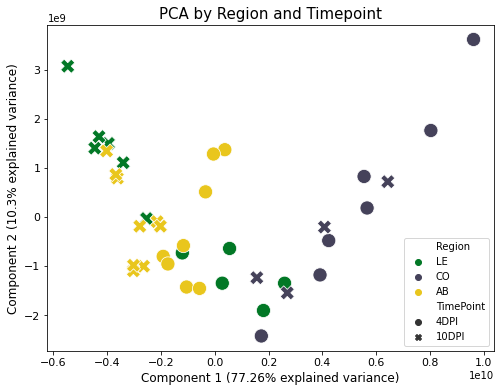

In [107]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize=(8,6))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Region'],palette=["#027826","#45425A","#E9C61D"], style=df_segm_pca_kmeans['TimePoint'], s=200, legend='full')
plt.title('PCA by Region and Timepoint', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.tick_params(axis='both', which='minor', labelsize=11)
plt.xlabel('Component 1 (' + str((pca_expl_var[0]*100).round(2)) +'% explained variance)', fontsize=12)
plt.ylabel('Component 2 (' + str((pca_expl_var[1]*100).round(2)) +'% explained variance)', fontsize=12)
plt.legend(loc='lower right')
plt.savefig('outs/' + date + '_combined_PCAwithRegionsandTimepoints.svg')

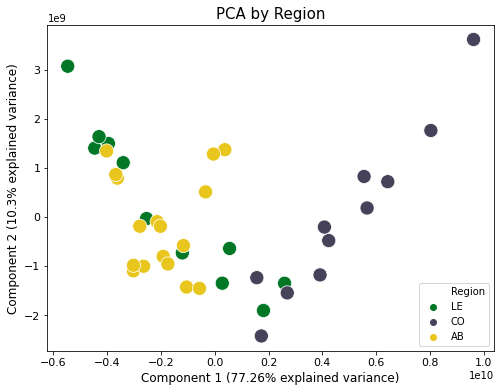

In [108]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize=(8,6))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Region'],palette=["#027826","#45425A","#E9C61D"],s=200, legend='full')
plt.title('PCA by Region', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.tick_params(axis='both', which='minor', labelsize=11)
plt.xlabel('Component 1 (' + str((pca_expl_var[0]*100).round(2)) +'% explained variance)', fontsize=12)
plt.ylabel('Component 2 (' + str((pca_expl_var[1]*100).round(2)) +'% explained variance)', fontsize=12)
plt.legend(loc='lower right')
plt.savefig('outs/' + date + '_combined_PCAbyRegion.svg')

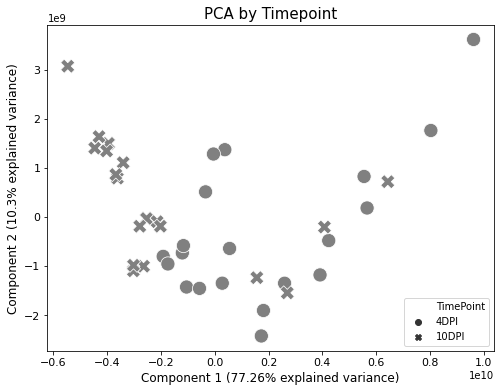

In [53]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize=(8,6))
sns.scatterplot(x_axis,
                y_axis, 
                color='grey', 
                style=df_segm_pca_kmeans['TimePoint'],
                s=200, 
                legend='full')
plt.title('PCA by Timepoint', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.tick_params(axis='both', which='minor', labelsize=11)
plt.xlabel('Component 1 (' + str((pca_expl_var[0]*100).round(2)) +'% explained variance)', fontsize=12)
plt.ylabel('Component 2 (' + str((pca_expl_var[1]*100).round(2)) +'% explained variance)', fontsize=12)
plt.legend(loc='lower right')
plt.savefig('outs/' + date + '_combined_PCAbyTimepoint.svg')

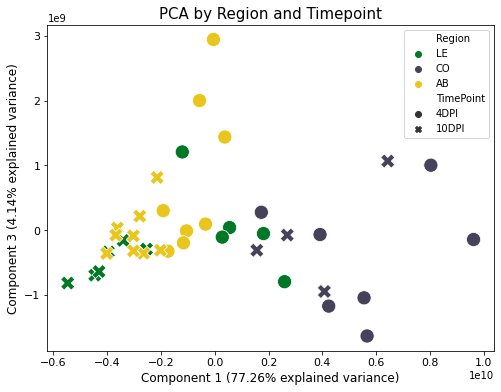

In [109]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize=(8,6))
sns.scatterplot(x_axis, 
                y_axis, 
                hue=df_segm_pca_kmeans['Region'],
                palette=["#027826","#45425A","#E9C61D"], 
                style=df_segm_pca_kmeans['TimePoint'], 
                s=200, 
                legend='full')
plt.title('PCA by Region and Timepoint', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.tick_params(axis='both', which='minor', labelsize=11)
plt.xlabel('Component 1 (' + str((pca_expl_var[0]*100).round(2)) +'% explained variance)', fontsize=12)
plt.ylabel('Component 3 (' + str((pca_expl_var[2]*100).round(2)) +'% explained variance)', fontsize=12)
plt.legend(loc='upper right')
plt.savefig('outs/' + date + '_combined_PCAwithRegionsandTimepoints_PC13.svg')

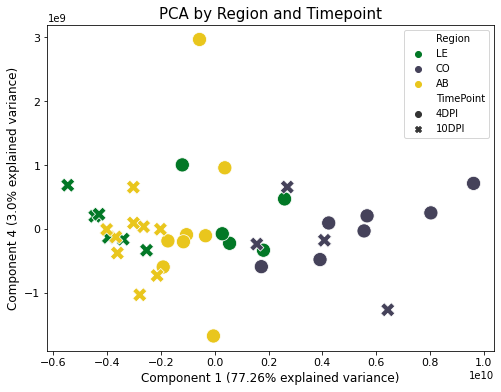

In [110]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 4']
plt.figure(figsize=(8,6))
sns.scatterplot(x_axis, 
                y_axis, 
                hue=df_segm_pca_kmeans['Region'],
                palette=["#027826","#45425A","#E9C61D"], 
                style=df_segm_pca_kmeans['TimePoint'], 
                s=200, 
                legend='full')
plt.title('PCA by Region and Timepoint', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.tick_params(axis='both', which='minor', labelsize=11)
plt.xlabel('Component 1 (' + str((pca_expl_var[0]*100).round(2)) +'% explained variance)', fontsize=12)
plt.ylabel('Component 4 (' + str((pca_expl_var[3]*100).round(2)) +'% explained variance)', fontsize=12)
plt.legend(loc='upper right')
plt.savefig('outs/' + date + '_combined_PCAwithRegionsandTimepoints_PC14.svg')

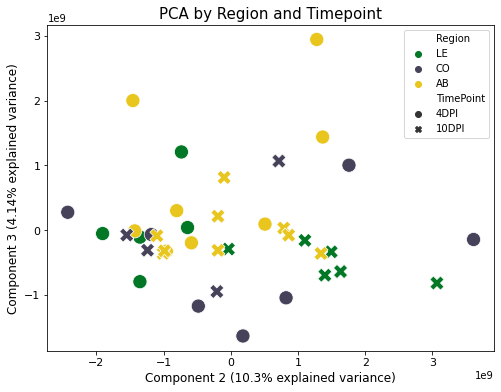

In [111]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize=(8,6))
sns.scatterplot(x_axis, y_axis, 
                hue=df_segm_pca_kmeans['Region'],
                palette=["#027826","#45425A","#E9C61D"], 
                style=df_segm_pca_kmeans['TimePoint'], 
                s=200, 
                legend='full')
plt.title('PCA by Region and Timepoint', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.tick_params(axis='both', which='minor', labelsize=11)
plt.xlabel('Component 2 (' + str((pca_expl_var[1]*100).round(2)) +'% explained variance)', fontsize=12)
plt.ylabel('Component 3 (' + str((pca_expl_var[2]*100).round(2)) +'% explained variance)', fontsize=12)
plt.legend(loc='upper right')
plt.savefig('outs/' + date + '_combined_PCAwithRegionsandTimepoints_PC23.svg')

In [129]:
palette_kmeans = ["#dd7373","#51a3a3","#37d4fb","#0d3b66","#7b3e19"]

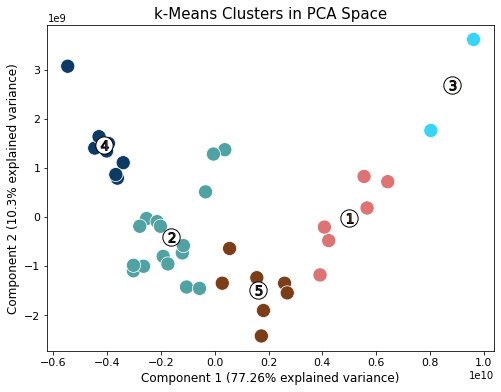

In [159]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize=(8,6))

sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Segment K-means PCA'],palette=palette_kmeans,s=200, legend=None)

plt.title('k-Means Clusters in PCA Space', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.tick_params(axis='both', which='minor', labelsize=11)
plt.xlabel('Component 1 (' + str((pca_expl_var[0]*100).round(2)) +'% explained variance)', fontsize=12)
plt.ylabel('Component 2 (' + str((pca_expl_var[1]*100).round(2)) +'% explained variance)', fontsize=12)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o',
                c="white", alpha=1, s=300, edgecolor='k')

for i, c in enumerate(cluster_centers):
    i = i+1
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')
    
plt.savefig('outs/' + date + '_combined_kClustersinPCAspace.svg')

In [329]:
print(cluster_centers)
print(type(cluster_centers))

[[ 4.97631614e+09 -2.62226294e+07 -6.36404452e+08 -2.77132768e+08
  -9.25103083e+07  3.85743372e+07  2.36238066e+07  1.51952879e+08
  -1.85638030e+08  3.75403214e+06 -3.76877118e+07  4.74203082e+07
  -3.99385925e+07 -1.51797031e+07  9.25132806e+06 -3.72809384e+05
  -2.22019011e+07  1.11803278e+07 -2.58436706e+07 -2.52654634e+07
  -1.57854945e+07  2.28581287e+06  6.09748976e+06 -3.96590426e+06
  -2.99693052e+06  1.38742397e+07  2.62176888e+06 -1.29283084e+07
   9.97017102e+06 -1.04632069e+07  4.54286107e+06 -1.08787849e+07
  -6.15299352e+06  5.28378862e+06  5.87929981e+06  3.46793520e+06
  -4.14142833e+06  6.79536245e+06  2.94952004e-07]
 [-1.61461434e+09 -4.01790671e+08  4.42629517e+08  4.61323893e+07
   1.85518933e+08 -1.18867632e+08 -6.88108370e+07  2.56672292e+05
   6.36768016e+06 -2.46156286e+07  3.84413546e+07 -6.18636555e+06
  -2.09401395e+07 -4.27549157e+07 -4.49396285e+06 -1.24708782e+07
   1.52469667e+07  1.92247824e+07 -1.34558012e+07 -3.10130684e+06
   8.44914232e+06  1.2465

In [59]:
cluster_centers.shape

(5, 39)

In [60]:
components.shape

(39, 3613)

In [61]:
centers = cluster_centers.dot(components)
centers.shape

(5, 3613)

In [62]:
centers = pd.DataFrame(centers, 
                       index=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], 
                       columns = X.columns)
centers.to_csv('outs/' + date + '_combined_centers_annotated.csv')

In [63]:
centers_t = centers.T
centers_t.shape

(3613, 5)

In [64]:
pGroups_proc.shape

(3613, 371)

In [217]:
#plot only staph markers
#first pull only staph index then pull centers_t based on that index

staph_idx = pGroups_proc.index[pGroups_proc['Fasta headers'].str.contains('aureus', regex=False)].tolist()
centers_t_staph = centers_t.iloc[staph_idx]
centers_t_staph.index = centers_t_staph.index.str.split(';',0).str[0]
centers_t_staph.to_csv('outs/' + date + '_staph_centers_annotated.csv')
centers_t_staph

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Protein IDs,,,,,
Q2FER6,-3.003200e+05,1.624625e+05,-3.003200e+05,2.381750e+05,-3.003200e+05
Q2FEQ8,-8.424872e+03,-8.424872e+03,-8.424872e+03,3.264638e+04,-8.424872e+03
Q2FHT6,-4.496051e+04,1.489261e+04,-4.496051e+04,5.451574e+04,-4.496051e+04
Q2FGF0,-2.179487e+04,-2.179487e+04,-2.179487e+04,8.445513e+04,-2.179487e+04
Q2FJA2,-9.495641e+03,-9.495641e+03,-9.495641e+03,3.679561e+04,-9.495641e+03
...,...,...,...,...,...
A0A2C9TKS1,-2.888718e+04,-2.888718e+04,-2.888718e+04,1.119378e+05,-2.888718e+04
A0A1S5YLT4,-2.152005e+06,1.383074e+05,2.077899e+07,-1.974355e+06,-2.152005e+06
A0A2C9TU38,-8.591956e+07,3.073015e+07,-8.591956e+07,9.707224e+07,-8.298626e+07


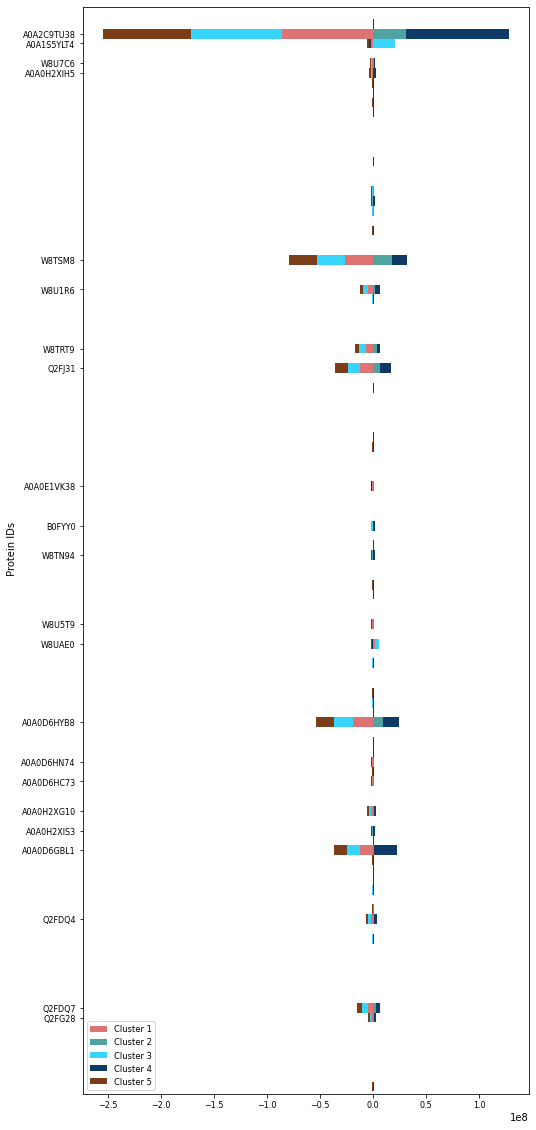

In [218]:
summed = centers_t_staph.abs().sum(axis=1)
sorted_mylist = sorted(((v, i) for i, v in enumerate(summed)), reverse=True)[0:22]
final = [lis[1] for lis in sorted_mylist]
finalID = centers_t_staph.iloc[final].index

centers_t_staph.iloc[final].to_csv('outs/' + date + '_finalID_staph_all.csv')

centers_t_staph.plot(kind="barh", stacked=True, width=1, figsize = (8,20), color=palette_kmeans)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.yticks(final, finalID)
#plt.xlim(-0.5e9, 0.5e9)
plt.legend(fontsize='small')
plt.savefig('outs/' + date + '_staph_kmeansCentroids_all.svg')

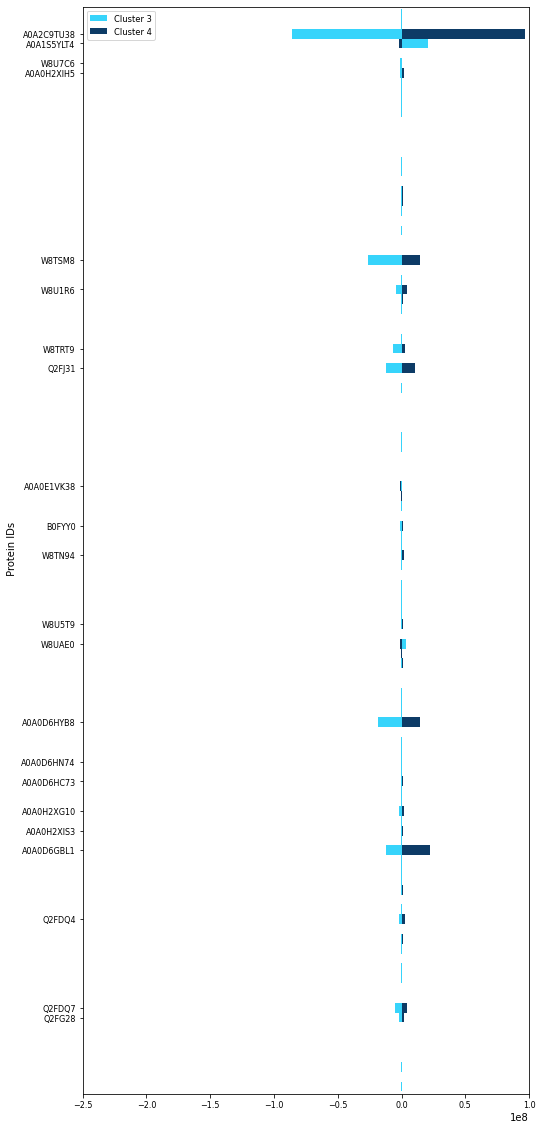

In [219]:
toPlot = ['Cluster 3', 'Cluster 4']

summed = centers_t_staph.abs().sum(axis=1)
sorted_mylist = sorted(((v, i) for i, v in enumerate(summed)), reverse=True)[0:22]
final = [lis[1] for lis in sorted_mylist]
finalID = centers_t_staph.iloc[final].index

centers_t_staph[toPlot].iloc[final].to_csv('outs/' + date + '_finalID_staph_34.csv')

centers_t_staph[toPlot].plot(kind="barh", stacked=True, width=1, figsize = (8,20), color=[palette_kmeans[2],palette_kmeans[3]])
plt.tick_params(axis='both', which='major', labelsize=8)
plt.yticks(final, finalID)
plt.xlim(-2.5e8, 1.0e8)
plt.legend(fontsize='small')
plt.savefig('outs/' + date + '_staph_kmeansCentroids_34.svg')

In [221]:
#plot only mouse markers
#first pull only mouse index then pull centers_t based on that index

mouse_idx = pGroups_proc.index[pGroups_proc['Fasta headers'].str.contains('musculus', regex=False, na=False)].tolist()
centers_t_mouse = centers_t.iloc[mouse_idx]
centers_t_mouse
centers_t_mouse.index = centers_t_mouse.index.str.split(';',0).str[0]
centers_t_mouse.to_csv('outs/' + date + '_mouse_centers_annotated.csv')
centers_t_mouse

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Protein IDs,,,,,
G3UZW7,-4.494667e+04,50722.708333,-44946.666664,-17170.416668,-44946.666667
O70589,4.249538e+04,-15230.865385,-29954.615385,-29954.615385,41181.098901
A0A140T8M9,-1.959910e+04,63072.564102,-102757.435898,-102757.435897,19429.706960
A0A075B5M7,-2.005736e+04,10793.891024,-20057.358967,16019.766022,-20057.358973
A0A075B5P3,-2.679115e+05,30169.086538,-267911.538460,441995.961538,-267911.538462
...,...,...,...,...,...
Q9Z2X1,-2.716608e+06,941850.641026,-180424.358974,517575.641026,-364245.787546
Q9Z2Z6,3.939454e+05,-255760.032051,429668.717949,-327846.282051,498845.860806
Q9Z315,-5.958347e+05,189973.381410,-820199.743590,427097.756410,-177278.315018


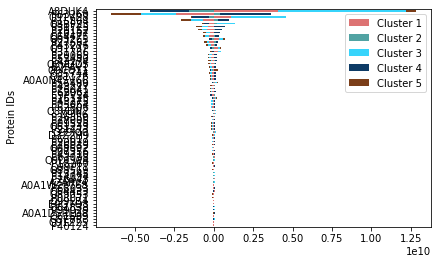

In [222]:
summed = centers_t_mouse.abs().sum(axis=1)
sorted_mylist = sorted(((v, i) for i, v in enumerate(summed)), reverse=True)[0:70]
final = [lis[1] for lis in sorted_mylist]
finalID = centers_t_mouse.iloc[final].index

#centers_t_mouse.iloc[final].to_csv('outs/' + date + '_finalID_mouse_all.csv')

centers_t_mouse.iloc[final].plot(kind="barh", stacked=True, color=palette_kmeans).invert_yaxis()
#plt.tick_params(axis='both', which='major', labelsize=8)
#plt.yticks(final, finalID)
#plt.xlim(-3e11, 3e11)
#plt.legend(fontsize='small')
#plt.savefig('outs/' + date + '_mouse_kmeansCentroids_all_np.svg')

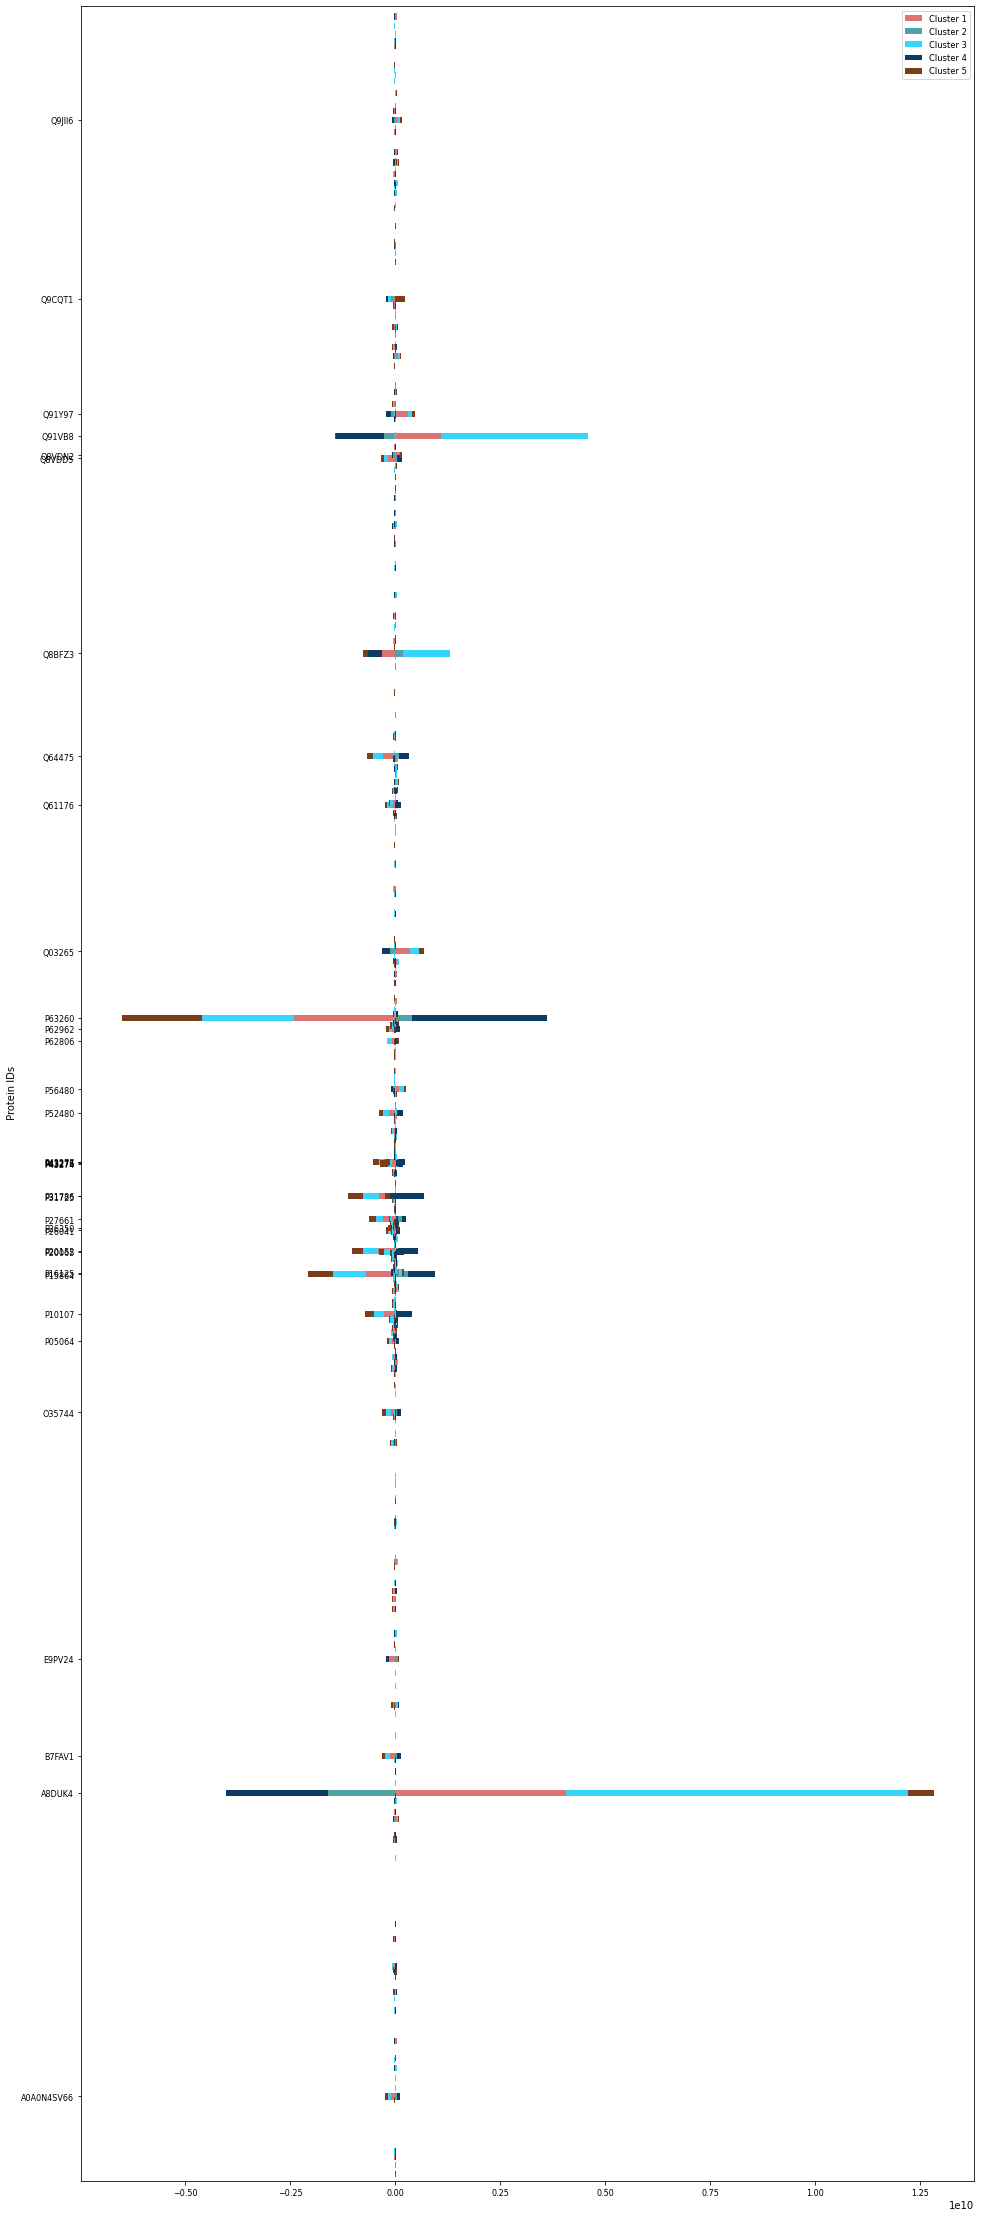

In [223]:
#plot centroids with top 1% proteins labeled

summed = centers_t_mouse.abs().sum(axis=1)
sorted_mylist = sorted(((v, i) for i, v in enumerate(summed)), reverse=True)[0:35]
final = [lis[1] for lis in sorted_mylist]
finalID = centers_t_mouse.iloc[final].index

centers_t_mouse.to_csv('outs/' + date + '_finalID_mouse_all.csv')

centers_t_mouse.plot(kind="barh", stacked=True, width=10, figsize = (16,40), color=palette_kmeans)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.yticks(final, finalID)
#plt.xlim(-3e11, 3e11)
plt.legend(fontsize='small')
plt.savefig('outs/' + date + '_mouse_kmeansCentroids_all_top35.svg')

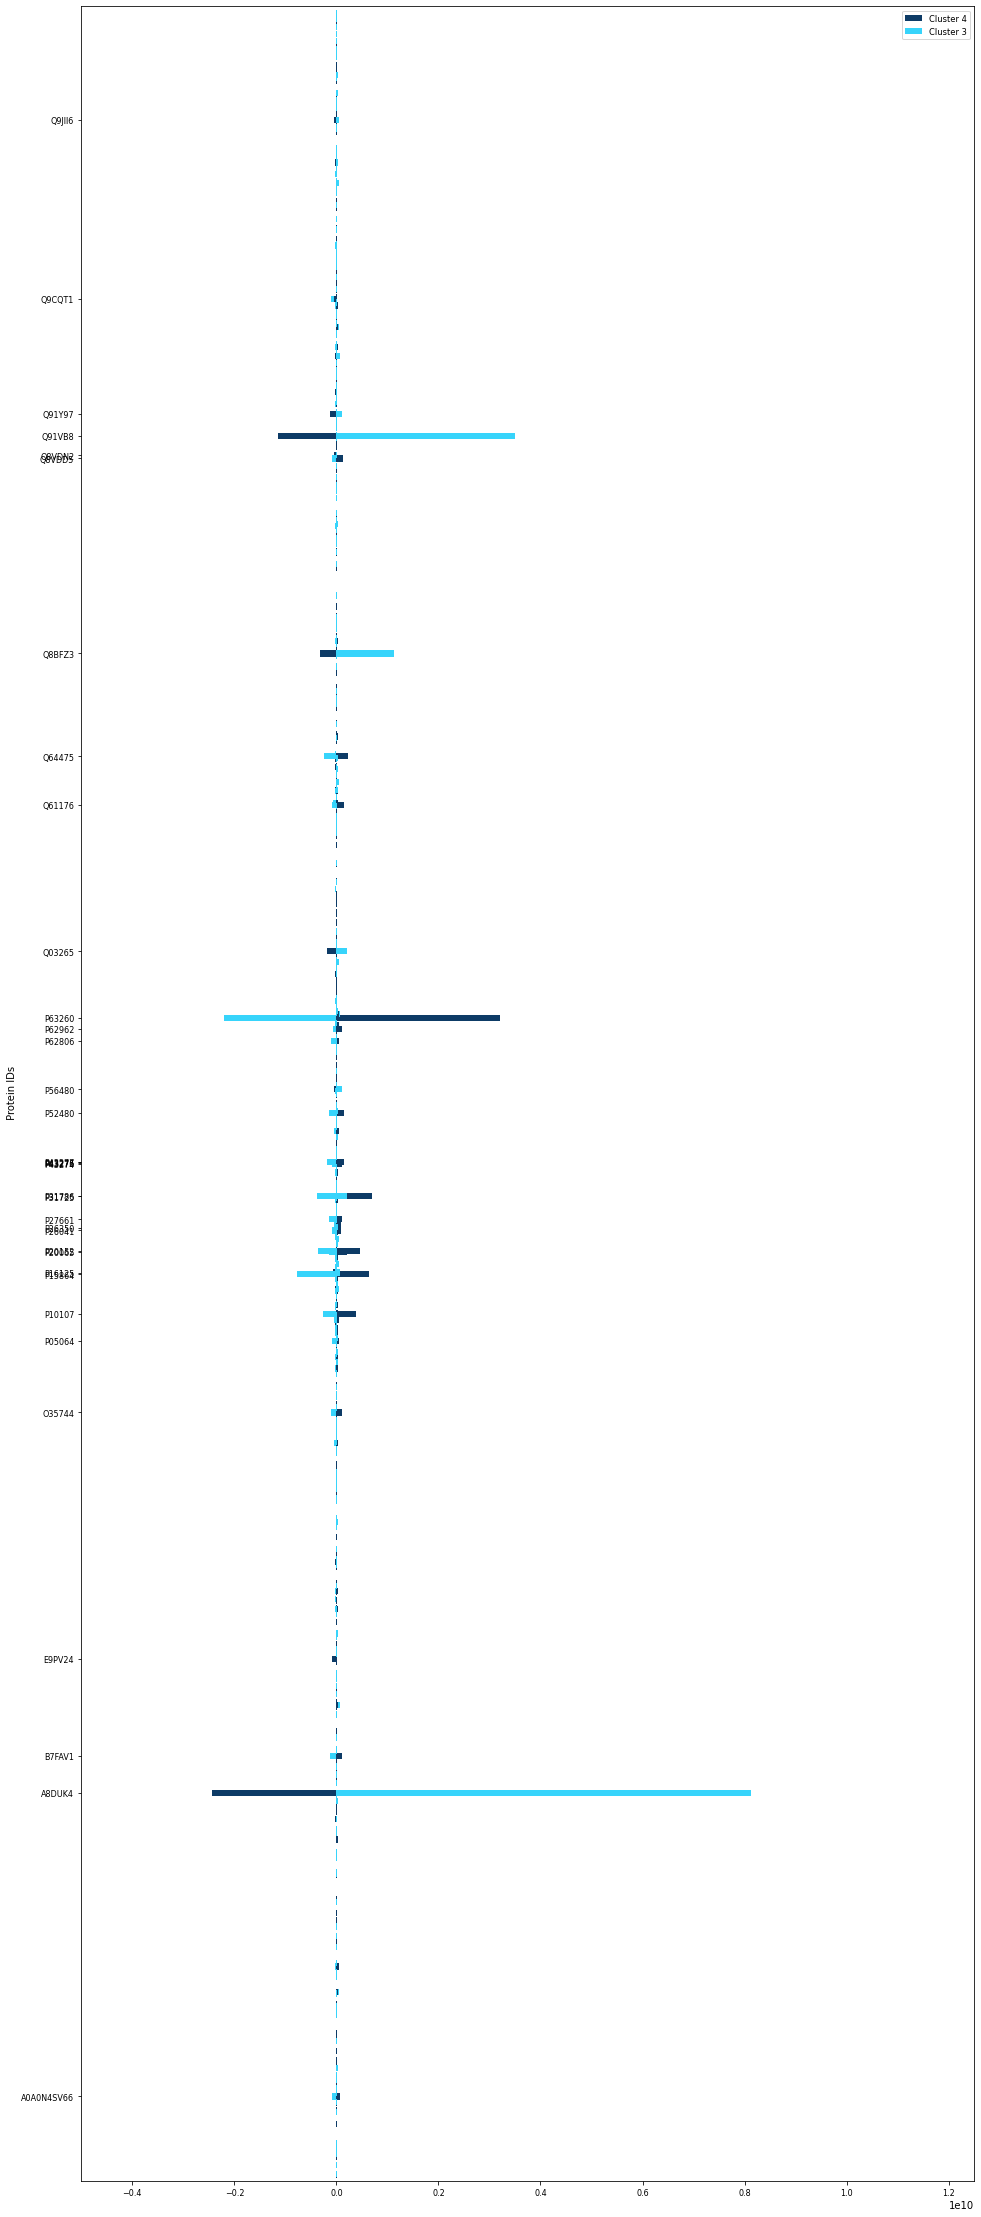

In [224]:
toPlot = ['Cluster 4', 'Cluster 3']

summed = centers_t_mouse.abs().sum(axis=1)
sorted_mylist = sorted(((v, i) for i, v in enumerate(summed)), reverse=True)[0:35]
final = [lis[1] for lis in sorted_mylist]
finalID = centers_t_mouse.iloc[final].index

centers_t_mouse[toPlot].iloc[final].to_csv('outs/' + date + '_finalID_mouse_43.csv')

centers_t_mouse[toPlot].plot(kind="barh", 
                             stacked=True, 
                             width=10, 
                             figsize = (16,40), 
                             color=[palette_kmeans[3],palette_kmeans[2]])
plt.tick_params(axis='both', which='major', labelsize=8)
plt.yticks(final, finalID)
plt.xlim(-0.50e10, 1.25e10)
plt.legend(fontsize='small')
plt.savefig('outs/' + date + '_mouse_kmeansCentroids_43.svg')

## Gene Ontology Enrichment Scores

### Extract top 100 proteins driving the clustering and run gene ontology enrichment analysis using their LFQ intensity values after normalization

In [129]:
allProt = pd.read_csv('outs/2021-12-14_finalID_mouse_all.csv', index_col = 0)
allProt.shape

(3503, 5)

In [130]:
summed = allProt.abs().sum(axis=1)
sorted_mylist = sorted(((v, i) for i, v in enumerate(summed)), reverse=True)[0:175]
final = [lis[1] for lis in sorted_mylist]
finalID = allProt.iloc[final].index
finalID

Index(['A8DUK4', 'P63260', 'Q91VB8', 'P15864', 'Q8BFZ3', 'P31725', 'P20152',
       'P10107', 'Q64475', 'Q03265',
       ...
       'Q3UZ39', 'Q8K2B3', 'P54071', 'Q5EBP8', 'Q3UHL6', 'P22599', 'Q64523',
       'F8WIT2', 'Q3THW5', 'P00920'],
      dtype='object', name=' Protein IDs', length=175)

In [131]:
lfq = pd.read_csv('outs/2021-12-14_combined_lfq.csv', index_col=0)
lfq = lfq.transpose()
lfq = lfq.drop(['TimePoint', 'TechRep', 'BioRep', 'Region', 'DPI_Region_BioRep', 'DPI_Region'], axis=0)
lfq

index,4DPI_2_LE_4,4DPI_2_LE_2,4DPI_2_LE_1,4DPI_1_LE_2,4DPI_1_LE_1,4DPI_3_CO_3,4DPI_3_CO_2,4DPI_2_CO_3,4DPI_2_CO_2,4DPI_2_CO_1,...,10DPI_3_CO_2,10DPI_4_AB_3,10DPI_4_AB_2,10DPI_4_AB_1,10DPI_3_AB_3,10DPI_3_AB_2,10DPI_3_AB_1,10DPI_2_AB_3,10DPI_2_AB_2,10DPI_2_AB_1
G3UZW7;A0A023T778;Q9CQL1;P61327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O70589;A0A067XG53;F6Y9I5,0,0,0,0,0,0,0,0,0,497950,...,434700,0,0,0,0,0,0,0,0,0
A0A140T8M9;A0A140T8M0;A0A0B4J1I0;A0A075B5N0;A0A075B5K8;F6XWB2;A0A140T8N1;A0A0G2JDE5;P01631,0,0,0,0,0,0,0,0,0,0,...,498950,1.6741e+06,431080,548100,0,0,0,0,0,0
A0A075B5M7;A0A0G2JDV4;A0A0B4J1J2;A0A0B4J1J1,0,0,0,0,0,0,0,0,0,0,...,0,202930,290690,0,0,0,0,0,0,0
A0A075B5P3;A0A0A6YVP0;P01867,0,0,0,0,0,0,0,0,0,0,...,0,1.2076e+06,1.5261e+06,1.1656e+06,0,0,724260,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Z2X1;J3QMT0;J3QM80;J3QP45;J3QMV8;J3QNH2,5.246e+06,3.0364e+06,3.9714e+06,9.2853e+06,6.0399e+06,2.6449e+06,0,2.4288e+06,2.6804e+06,2.0776e+06,...,2.1112e+06,6.5735e+06,6.941e+06,6.2944e+06,4.6115e+06,6.5767e+06,5.9742e+06,2.8952e+06,3.8473e+06,6.8296e+06
Q9Z2Z6,0,668000,0,1.4414e+06,1.1892e+06,1.3931e+06,950880,1.0941e+06,1.1699e+06,1.1146e+06,...,0,338860,0,0,0,0,0,0,0,0
Q9Z315;A0A494B9E9,954220,1.3774e+06,922440,0,1.1176e+06,638210,661230,0,494860,674540,...,556170,1.1378e+06,1.3022e+06,0,1.7312e+06,1.4447e+06,1.0595e+06,3.3433e+06,800330,2.3382e+06
S4R2J6;S4R165;S4R1X7;S4R2C1;S4R187;S4R2F5,0,0,0,0,0,0,0,662690,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
lfq.index = lfq.index.str.split(';',0).str[0]
lfq

index,4DPI_2_LE_4,4DPI_2_LE_2,4DPI_2_LE_1,4DPI_1_LE_2,4DPI_1_LE_1,4DPI_3_CO_3,4DPI_3_CO_2,4DPI_2_CO_3,4DPI_2_CO_2,4DPI_2_CO_1,...,10DPI_3_CO_2,10DPI_4_AB_3,10DPI_4_AB_2,10DPI_4_AB_1,10DPI_3_AB_3,10DPI_3_AB_2,10DPI_3_AB_1,10DPI_2_AB_3,10DPI_2_AB_2,10DPI_2_AB_1
G3UZW7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O70589,0,0,0,0,0,0,0,0,0,497950,...,434700,0,0,0,0,0,0,0,0,0
A0A140T8M9,0,0,0,0,0,0,0,0,0,0,...,498950,1.6741e+06,431080,548100,0,0,0,0,0,0
A0A075B5M7,0,0,0,0,0,0,0,0,0,0,...,0,202930,290690,0,0,0,0,0,0,0
A0A075B5P3,0,0,0,0,0,0,0,0,0,0,...,0,1.2076e+06,1.5261e+06,1.1656e+06,0,0,724260,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Z2X1,5.246e+06,3.0364e+06,3.9714e+06,9.2853e+06,6.0399e+06,2.6449e+06,0,2.4288e+06,2.6804e+06,2.0776e+06,...,2.1112e+06,6.5735e+06,6.941e+06,6.2944e+06,4.6115e+06,6.5767e+06,5.9742e+06,2.8952e+06,3.8473e+06,6.8296e+06
Q9Z2Z6,0,668000,0,1.4414e+06,1.1892e+06,1.3931e+06,950880,1.0941e+06,1.1699e+06,1.1146e+06,...,0,338860,0,0,0,0,0,0,0,0
Q9Z315,954220,1.3774e+06,922440,0,1.1176e+06,638210,661230,0,494860,674540,...,556170,1.1378e+06,1.3022e+06,0,1.7312e+06,1.4447e+06,1.0595e+06,3.3433e+06,800330,2.3382e+06
S4R2J6,0,0,0,0,0,0,0,662690,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df = lfq.loc[finalID]
df

index,4DPI_2_LE_4,4DPI_2_LE_2,4DPI_2_LE_1,4DPI_1_LE_2,4DPI_1_LE_1,4DPI_3_CO_3,4DPI_3_CO_2,4DPI_2_CO_3,4DPI_2_CO_2,4DPI_2_CO_1,...,10DPI_3_CO_2,10DPI_4_AB_3,10DPI_4_AB_2,10DPI_4_AB_1,10DPI_3_AB_3,10DPI_3_AB_2,10DPI_3_AB_1,10DPI_2_AB_3,10DPI_2_AB_2,10DPI_2_AB_1
Protein IDs,,,,,,,,,,,,,,,,,,,,,
A8DUK4,1.7442e+09,3.4139e+09,2.9423e+09,5.1737e+09,3.8777e+09,5.782e+09,6.8564e+09,8.5305e+09,8.4491e+09,3.4106e+09,...,8.122e+09,5.3066e+08,9.5197e+08,6.2291e+08,8.5632e+08,8.6326e+08,9.2512e+08,1.0979e+09,1.2606e+09,1.8661e+09
P63260,4.1307e+09,3.378e+09,2.9545e+09,1.771e+09,1.6077e+09,1.2741e+09,1.8186e+09,1.5937e+09,2.1845e+09,1.5055e+09,...,1.3877e+09,4.8895e+09,4.6028e+09,4.8811e+09,6.279e+09,6.4949e+09,7.117e+09,4.7165e+09,4.8012e+09,4.7378e+09
Q91VB8,1.7297e+09,1.9171e+09,1.4639e+09,1.3123e+09,1.8905e+09,2.7786e+09,1.9416e+09,2.0437e+09,2.8438e+09,2.0836e+09,...,5.3114e+09,3.0269e+08,4.4618e+08,3.8388e+08,1.0176e+09,8.2537e+08,6.0648e+08,1.3203e+09,2.0021e+09,8.6326e+08
P15864,9.1421e+08,6.0707e+08,3.477e+08,4.7936e+08,5.7903e+08,2.5711e+08,2.659e+08,3.1331e+08,2.7457e+08,3.3855e+08,...,3.7537e+08,8.0293e+08,1.3161e+09,1.2945e+09,2.0244e+09,1.426e+09,1.6338e+09,3.6126e+09,1.3788e+09,2.4812e+09
Q8BFZ3,1.6431e+09,500220,6.6487e+06,4.4522e+08,4.3693e+07,0,487500,1.944e+06,511750,404450,...,2.1978e+06,4.975e+08,802690,4.6505e+06,2.016e+07,1.8383e+07,1.1963e+06,0,5.581e+06,4.5486e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P22599,2.9736e+07,2.3138e+07,3.2037e+07,4.2849e+06,2.4446e+07,2.9112e+07,3.2685e+07,2.5324e+07,3.483e+07,1.8534e+07,...,3.1196e+07,2.005e+07,1.6024e+07,1.3344e+07,1.1475e+07,9.8682e+06,1.4829e+07,1.6949e+06,1.2092e+07,6.6191e+06
Q64523,4.6711e+07,8.0783e+07,3.532e+07,5.2353e+07,8.9203e+07,3.3176e+07,3.0386e+07,1.1554e+08,4.493e+07,1.6208e+07,...,5.4759e+07,6.4041e+07,1.1079e+08,5.712e+07,6.8067e+07,6.8305e+07,6.2162e+07,7.2188e+07,1.1346e+08,5.8851e+07
F8WIT2,2.2663e+07,1.4908e+07,3.6708e+07,1.3592e+06,4.1288e+06,1.5675e+06,4.3106e+06,1.0905e+07,1.2193e+07,2.284e+06,...,1.9329e+06,2.8045e+07,2.4982e+07,2.3535e+07,2.866e+07,4.5345e+07,4.2387e+07,1.0955e+07,1.5971e+07,4.3004e+06


In [134]:
df2 = df.transpose()
df2 = df2.astype('int64')

In [135]:
df3 = StandardScaler().fit_transform(df2)
df3 = pd.DataFrame(df3, columns=df2.columns, index=df2.index)
df3

Protein IDs,A8DUK4,P63260,Q91VB8,P15864,Q8BFZ3,P31725,P20152,P10107,Q64475,Q03265,...,Q3UZ39,Q8K2B3,P54071,Q5EBP8,Q3UHL6,P22599,Q64523,F8WIT2,Q3THW5,P00920
index,,,,,,,,,,,,,,,,,,,,,
4DPI_2_LE_4,-0.540090,0.021508,-0.022581,-0.236924,1.759115,-0.206117,-0.124103,-0.339158,0.487461,-0.225207,...,0.009676,-0.563738,-0.572222,1.176545,0.479523,1.060029,-0.806552,0.333282,0.265110,0.825307
4DPI_2_LE_2,0.019054,-0.337894,0.113558,-0.642223,-0.428211,-0.643921,-0.213255,-0.527045,-0.433295,0.089789,...,-0.480505,0.312642,0.108868,-0.112737,1.020549,0.448626,0.748592,-0.255785,-0.275693,-0.570818
4DPI_2_LE_1,-0.138874,-0.540108,-0.215675,-0.984486,-0.420023,-0.478166,-0.400444,-0.238710,-0.155440,-0.369529,...,-0.124023,-0.195956,-0.288919,-0.287406,3.358514,1.273251,-1.326470,1.400135,-0.002805,0.761545
4DPI_1_LE_2,0.608371,-1.105209,-0.325806,-0.810748,0.163989,-0.708444,-0.569122,-1.012065,0.125845,-0.241213,...,-1.111607,-0.847701,-1.313029,2.526452,-1.398293,-1.298396,-0.549035,-1.284947,-2.020523,-0.954043
4DPI_1_LE_1,0.174370,-1.183182,0.094234,-0.679225,-0.370694,-0.682565,-0.517408,-0.894347,-1.043352,0.168928,...,-0.794028,-0.183291,-0.396191,-0.633064,-0.763125,0.569832,1.132906,-1.074569,0.933596,-0.258719
4DPI_3_CO_3,0.812077,-1.342470,0.739405,-1.104028,-0.428877,-0.716880,-1.326299,-1.073669,-1.645795,1.809980,...,-1.111607,2.389069,2.780540,-1.209991,-1.200441,1.002206,-1.424328,-1.269124,-0.793134,-0.013643
4DPI_3_CO_2,1.171869,-1.082481,0.131356,-1.092429,-0.428228,-0.716880,-1.250061,-1.073243,-1.052557,1.360204,...,-1.075394,2.642528,1.103917,-1.254383,-1.116769,1.333298,-1.551672,-1.060759,-1.155481,-0.271509
4DPI_2_CO_3,1.732487,-1.189867,0.205528,-1.029867,-0.426288,-0.716880,-1.103115,-1.059976,-1.384593,2.563874,...,-1.111607,0.289798,0.747838,-1.480287,-0.601693,0.651192,2.335002,-0.559851,-0.221566,2.297385
4DPI_2_CO_2,1.705228,-0.907770,0.786771,-1.080988,-0.428195,-0.706149,-1.122011,-0.999513,-1.012349,1.560213,...,-0.985139,0.927562,2.473702,-1.063374,-0.635564,1.532065,-0.887842,-0.462015,-0.398230,1.458584


In [136]:
kmeans = pd.read_csv('outs/2021-12-14_combined_df_segm_pca_kmeans.csv', index_col=0)
kmeans

,G3UZW7;A0A023T778;Q9CQL1;P61327,O70589;A0A067XG53;F6Y9I5,A0A140T8M9;A0A140T8M0;A0A0B4J1I0;A0A075B5N0;A0A075B5K8;F6XWB2;A0A140T8N1;A0A0G2JDE5;P01631,A0A075B5M7;A0A0G2JDV4;A0A0B4J1J2;A0A0B4J1J1,A0A075B5P3;A0A0A6YVP0;P01867,A0A075B5P5;A0A1Y7VJN6;P03987,A0A075B6A0;A0A075B5P6;P01872,A0A075B5R2;A0A075B5R3;A0A0A6YX91;P01786,A0A075B5S5;A0A0A6YXL5,A0A075B5T3;J3QK03;A0A0A6YWS9,...,35,36,37,38,Segment K-means PCA,TimePoint,BioRep,TechRep,Region,DPI_Region
index,,,,,,,,,,,,,,,,,,,,,
4DPI_2_LE_4,0.0,0.0,0.0,0.0,0.0,0.0,11850000.0,489990.0,0.0,0.0,...,-1.795604e+07,-9.667796e+06,3.778624e+07,2.949520e-07,1,4DPI,2,4,LE,4DPI_LE
4DPI_2_LE_2,0.0,0.0,0.0,0.0,0.0,0.0,13198000.0,0.0,0.0,0.0,...,1.308858e+07,4.484831e+07,3.021682e+07,2.949520e-07,4,4DPI,2,2,LE,4DPI_LE
4DPI_2_LE_1,0.0,0.0,0.0,0.0,0.0,0.0,14041000.0,1280300.0,0.0,0.0,...,-1.051462e+05,-3.927658e+07,-2.821519e+07,2.949520e-07,4,4DPI,2,1,LE,4DPI_LE
4DPI_1_LE_2,0.0,0.0,0.0,0.0,0.0,0.0,8327300.0,0.0,0.0,0.0,...,2.405616e+06,1.602163e+07,1.157634e+07,2.949520e-07,4,4DPI,1,2,LE,4DPI_LE
4DPI_1_LE_1,0.0,0.0,0.0,0.0,0.0,0.0,9088300.0,0.0,0.0,0.0,...,-5.298398e+06,-2.771801e+07,-1.684883e+07,2.949520e-07,4,4DPI,1,1,LE,4DPI_LE
4DPI_3_CO_3,0.0,0.0,0.0,0.0,0.0,0.0,28479000.0,0.0,0.0,0.0,...,-1.738281e+07,-2.290089e+07,1.351457e+07,2.949520e-07,0,4DPI,3,3,CO,4DPI_CO
4DPI_3_CO_2,0.0,0.0,0.0,0.0,0.0,0.0,9475600.0,0.0,0.0,0.0,...,1.283383e+07,1.978959e+07,-2.313470e+07,2.949520e-07,0,4DPI,3,2,CO,4DPI_CO
4DPI_2_CO_3,0.0,0.0,0.0,0.0,0.0,0.0,12548000.0,537080.0,0.0,0.0,...,3.378556e+06,6.588185e+06,-3.016993e+07,2.949520e-07,0,4DPI,2,3,CO,4DPI_CO
4DPI_2_CO_2,0.0,0.0,0.0,0.0,0.0,0.0,17613000.0,1492000.0,0.0,0.0,...,-1.520346e+07,-2.862014e+07,5.637718e+07,2.949520e-07,0,4DPI,2,2,CO,4DPI_CO


In [137]:
df3['k'] = kmeans['Segment K-means PCA']
df3

Protein IDs,A8DUK4,P63260,Q91VB8,P15864,Q8BFZ3,P31725,P20152,P10107,Q64475,Q03265,...,Q8K2B3,P54071,Q5EBP8,Q3UHL6,P22599,Q64523,F8WIT2,Q3THW5,P00920,k
index,,,,,,,,,,,,,,,,,,,,,
4DPI_2_LE_4,-0.540090,0.021508,-0.022581,-0.236924,1.759115,-0.206117,-0.124103,-0.339158,0.487461,-0.225207,...,-0.563738,-0.572222,1.176545,0.479523,1.060029,-0.806552,0.333282,0.265110,0.825307,1
4DPI_2_LE_2,0.019054,-0.337894,0.113558,-0.642223,-0.428211,-0.643921,-0.213255,-0.527045,-0.433295,0.089789,...,0.312642,0.108868,-0.112737,1.020549,0.448626,0.748592,-0.255785,-0.275693,-0.570818,4
4DPI_2_LE_1,-0.138874,-0.540108,-0.215675,-0.984486,-0.420023,-0.478166,-0.400444,-0.238710,-0.155440,-0.369529,...,-0.195956,-0.288919,-0.287406,3.358514,1.273251,-1.326470,1.400135,-0.002805,0.761545,4
4DPI_1_LE_2,0.608371,-1.105209,-0.325806,-0.810748,0.163989,-0.708444,-0.569122,-1.012065,0.125845,-0.241213,...,-0.847701,-1.313029,2.526452,-1.398293,-1.298396,-0.549035,-1.284947,-2.020523,-0.954043,4
4DPI_1_LE_1,0.174370,-1.183182,0.094234,-0.679225,-0.370694,-0.682565,-0.517408,-0.894347,-1.043352,0.168928,...,-0.183291,-0.396191,-0.633064,-0.763125,0.569832,1.132906,-1.074569,0.933596,-0.258719,4
4DPI_3_CO_3,0.812077,-1.342470,0.739405,-1.104028,-0.428877,-0.716880,-1.326299,-1.073669,-1.645795,1.809980,...,2.389069,2.780540,-1.209991,-1.200441,1.002206,-1.424328,-1.269124,-0.793134,-0.013643,0
4DPI_3_CO_2,1.171869,-1.082481,0.131356,-1.092429,-0.428228,-0.716880,-1.250061,-1.073243,-1.052557,1.360204,...,2.642528,1.103917,-1.254383,-1.116769,1.333298,-1.551672,-1.060759,-1.155481,-0.271509,0
4DPI_2_CO_3,1.732487,-1.189867,0.205528,-1.029867,-0.426288,-0.716880,-1.103115,-1.059976,-1.384593,2.563874,...,0.289798,0.747838,-1.480287,-0.601693,0.651192,2.335002,-0.559851,-0.221566,2.297385,0
4DPI_2_CO_2,1.705228,-0.907770,0.786771,-1.080988,-0.428195,-0.706149,-1.122011,-0.999513,-1.012349,1.560213,...,0.927562,2.473702,-1.063374,-0.635564,1.532065,-0.887842,-0.462015,-0.398230,1.458584,0


In [138]:
df3['k'] = df3['k'].astype('category')
df3.dtypes

 Protein IDs
A8DUK4     float64
P63260     float64
Q91VB8     float64
P15864     float64
Q8BFZ3     float64
            ...   
Q64523     float64
F8WIT2     float64
Q3THW5     float64
P00920     float64
k         category
Length: 176, dtype: object

In [139]:
df4 = df3.groupby(['k']).mean()
df4

Protein IDs,A8DUK4,P63260,Q91VB8,P15864,Q8BFZ3,P31725,P20152,P10107,Q64475,Q03265,...,Q3UZ39,Q8K2B3,P54071,Q5EBP8,Q3UHL6,P22599,Q64523,F8WIT2,Q3THW5,P00920
k,,,,,,,,,,,,,,,,,,,,,
0,1.364468,-1.142684,0.793830,-0.924165,-0.427736,-0.714189,-1.182541,-1.039839,-1.206623,1.604449,...,-1.070662,1.351245,1.478997,-1.147585,-1.116524,0.733060,-0.352238,-0.890956,-0.533324,0.456542
1,-0.533325,0.193813,-0.198111,0.390770,0.249214,-0.002631,0.226909,0.107435,0.373217,-0.546620,...,0.250782,-0.520568,-0.438029,0.135221,0.396987,-0.219702,0.357684,-0.045421,0.448206,-0.034434
2,2.723221,-1.048986,2.536927,-1.012771,1.507039,-0.715617,-1.096702,-1.052728,-0.990719,0.946942,...,-1.076810,0.387347,1.037993,-0.959059,-0.569239,2.216534,-0.965092,-0.320199,0.610658,1.840746
3,-0.815426,1.529644,-0.825793,0.853310,-0.420085,1.301621,1.376248,1.551930,0.965820,-0.792006,...,1.285998,-0.635611,-0.693897,0.938675,0.419476,-0.719851,0.008573,1.348321,0.041368,-0.491595
4,0.203337,-0.912013,-0.008674,-0.786896,-0.153486,-0.664928,-0.764553,-0.827130,-0.639550,0.508770,...,-0.817557,0.647400,0.229953,-0.124187,-0.267141,0.063231,-0.249702,-0.581957,-0.789088,-0.276721


In [140]:
df5 = df4[df4>0]
df5

Protein IDs,A8DUK4,P63260,Q91VB8,P15864,Q8BFZ3,P31725,P20152,P10107,Q64475,Q03265,...,Q3UZ39,Q8K2B3,P54071,Q5EBP8,Q3UHL6,P22599,Q64523,F8WIT2,Q3THW5,P00920
k,,,,,,,,,,,,,,,,,,,,,
0,1.364468,NaN,0.793830,NaN,NaN,NaN,NaN,NaN,NaN,1.604449,...,NaN,1.351245,1.478997,NaN,NaN,0.733060,NaN,NaN,NaN,0.456542
1,NaN,0.193813,NaN,0.39077,0.249214,NaN,0.226909,0.107435,0.373217,NaN,...,0.250782,NaN,NaN,0.135221,0.396987,NaN,0.357684,NaN,0.448206,NaN
2,2.723221,NaN,2.536927,NaN,1.507039,NaN,NaN,NaN,NaN,0.946942,...,NaN,0.387347,1.037993,NaN,NaN,2.216534,NaN,NaN,0.610658,1.840746
3,NaN,1.529644,NaN,0.85331,NaN,1.301621,1.376248,1.551930,0.965820,NaN,...,1.285998,NaN,NaN,0.938675,0.419476,NaN,0.008573,1.348321,0.041368,NaN
4,0.203337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.508770,...,NaN,0.647400,0.229953,NaN,NaN,0.063231,NaN,NaN,NaN,NaN


In [141]:
proteinIDs = []

for i in range(0,5):
    proteinList = df5.iloc[i][-df5.iloc[i].isnull()].index
    proteinIDs.append(proteinList)

proteinIDs

[Index(['A8DUK4', 'Q91VB8', 'Q03265', 'Q91Y97', 'P31786', 'P56480', 'P16125',
        'Q8VDN2', 'Q9JII6', 'Q99KI0', 'P63038', 'Q9DCW4', 'P13745', 'P14094',
        'P26443', 'A2ARV4', 'Q64433', 'Q61838', 'P99029', 'G5E8R3', 'P08249',
        'Q62468', 'P24270', 'Q64442', 'Q61646', 'O88844', 'Q9EQ20', 'Q9DBM2',
        'Q9D881', 'Q9Z2I8', 'P45952', 'P70441', 'P97450', 'P17751', 'Q8K0L3',
        'Q921I1', 'A3KGU5', 'P38647', 'P51881', 'P56391', 'P14152',
        'A0A0R4J1V0', 'Q62433', 'P10922', 'Q8BWT1', 'E9PZF0', 'P05202',
        'A0A1L1SV25', 'Q9DB20', 'F8WIP8', 'O08749', 'P48758', 'Q60932',
        'Q9DCX2', 'P16460', 'P07724', 'P17182', 'P56135', 'Q62261', 'Q91X72',
        'Q8VC30', 'Q9QXD6', 'Q8QZT1', 'P52760', 'Q9JLJ2', 'P47199', 'Q8R0Y6',
        'Q8CHT0', 'Q8K2B3', 'P54071', 'P22599', 'P00920'],
       dtype='object', name=' Protein IDs'),
 Index(['P63260', 'P15864', 'Q8BFZ3', 'P20152', 'P10107', 'Q64475', 'P27661',
        'P43276', 'P20065', 'P52480', 'P43274', 'Q8VDD5', 'B

In [142]:
test = pd.DataFrame(proteinIDs)
test.to_csv('outs/2021-12-14_topProteins_175.csv')

### Run proteins from line above in PANTHER and generate gene ontology classifications, then proceed with code below to combine GO information per cluster into one dataframe

In [144]:
path = 'outs/'

fileNames = ['/*proteinClass_175.txt']
geneOntologyTerm = ['ProteinClass']

for file, go in zip(fileNames, geneOntologyTerm):
    
    files = glob.glob(path + file)

    li = []
    clusterID = []
    
    for f in files: 
        c = f.split('/')[1].split('_')[0]
        clusterID.append(c)
        
    for filename, c in zip(files, clusterID): 
        df = pd.read_csv(filename, index_col = None, header = None, sep = '\t')
        df['cluster'] = str(c)
        li.append(df)

    finalDf = pd.concat(li, axis=0, ignore_index=True).sort_values('cluster')
    finalDf.columns = ['idx','Category name (Accession)','# genes', 'Percent of gene hit against total # genes', 'Percent of gene hit against total # Protein Class hits', 'cluster']

    finalDf.to_csv('outs/panther_combined_gene_ontology_' + str(go) + '_175.csv')

In [145]:
#save enrichment scores

geneOntologyTerm = ['ProteinClass']

for go in geneOntologyTerm:
    df = pd.read_csv('outs/panther_combined_gene_ontology_' + str(go) + '_175.csv', index_col = 0)
    df = df[['Category name (Accession)', '# genes', 'cluster']]
    df = df.pivot(index = 'Category name (Accession)', columns = 'cluster')
    df['# genes'].to_csv('outs/numberGenes_' + str(go) + '_175.csv')

    